In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

C:\Users\jphil\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
answers=pd.read_csv(os.path.join(path, 'Achievement 1', 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [4]:
answers=answers.drop(['DATE'], axis=1)

In [5]:
y=answers

In [6]:
X=pd.read_csv(os.path.join(path, 'Achievement 2', 'Data Sets', 'unscaled_cleaned.csv'), index_col=False)
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06                0.0                 2.0   
...                       ...                ...                 ...   
22945                    0.18                5.7                18.2   
22946              

# Data Wrangling- Shaping and Splitting

In [7]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [12]:
X = X.reshape(-1,15,9)

In [13]:
X.shape

(22950, 15, 9)

In [14]:
# Use argmax to transform y

y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
y.shape

(22950,)

In [16]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

In [17]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212,)
(5738, 15, 9) (5738,)


# Bayesian Optimization for CNN Model

In [19]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 # Number of weather stations
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [41]:
import time
import pandas as pd
from bayes_opt import BayesianOptimization
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Your existing function with added debugging
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU, 'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

    # Debug: Check for NaNs in y_train before cross-validation
    print("Checking for NaNs in y_train before cross-validation:")
    print(pd.isnull(y_train).sum())  # Should print 0 if there are no NaNs

    # Check the type and data type of y_train
    print("Type of y_train:", type(y_train))
    print("Data type of y_train:", y_train.dtype)  # Should be numeric, e.g., `float64` or `int64`

    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    try:
        score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks': [es]}).mean()
    except ValueError as e:
        print("Error during cross-validation:", e)
        return float('nan')  # Return NaN if an error occurs to prevent breaking the optimization

    return score

# Set up parameter bounds for Bayesian optimization
params = {
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation': (0, 9), 
    'optimizer': (0, 7),
    'learning_rate': (0.01, 1),
    'batch_size': (200, 1000), 
    'epochs': (20, 50),
    'layers1': (1, 3),
    'layers2': (1, 3),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0, 0.3)
}

# Run Bayesian Optimization with added debug outputs
start = time.time()
nn_opt = BayesianOptimization(bay_area, params, random_state=42)

# Check initial target values before optimization starts
print("Initial target values before optimization:")
print(nn_opt._space.target)  # Inspect if there are NaNs or unexpected values in initial targets

# Run the optimization
try:
    nn_opt.maximize(init_points=15, n_iter=4)
except ValueError as e:
    print("Error during optimization:", e)

print('Search took %s minutes' % ((time.time() - start) / 60))


Initial target values before optimization:
[]
|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking for NaNs in y_train before cross-validation:
0
Type of y_train: <class 'numpy.ndarray'>
Data type of y_train: int64
Epoch 1/25
15/15 - 2s - 165ms/step - accuracy: 0.5994 - loss: 2.7047
Epoch 2/25
15/15 - 0s - 26ms/step - accuracy: 0.6440 - loss: 2.7004
Epoch 3/25
15/15 - 0s - 24ms/step - accuracy: 0.6440 - loss: 2.6970
Epoch 4/25
15/15 - 0s - 24ms/step - accuracy: 0.6440 - loss: 2.6941
Epoch 5/25
15/15 - 0s - 24ms/step - accuracy: 0.6440 - loss: 2.6916
Epoch 6/25
15/15 - 0s - 24ms/step - accuracy: 0.6440 - loss: 2.6893
Epoch 7/25
15/15 - 0s - 24ms/step - accuracy: 0.6440 - loss: 2.6871
Epoch 8/25
1

Epoch 12/25
15/15 - 0s - 30ms/step - accuracy: 0.6439 - loss: 2.6784
Epoch 13/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6768
Epoch 14/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6753
Epoch 15/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6738
Epoch 16/25
15/15 - 0s - 30ms/step - accuracy: 0.6439 - loss: 2.6724
Epoch 17/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6710
Epoch 18/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6696
Epoch 19/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6682
Epoch 20/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6668
Epoch 21/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6655
Epoch 22/25
15/15 - 0s - 30ms/step - accuracy: 0.6439 - loss: 2.6641
Epoch 23/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6628
Epoch 24/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6614
Epoch 25/25
15/15 - 0s - 29ms/step - accuracy: 0.6439 - loss: 2.6600
4/4 - 0s - 59ms/step
| 1         |

Epoch 18/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 19/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 20/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 21/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 22/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 23/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 24/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 25/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 26/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 27/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 28/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
Epoch 29/29
38/38 - 0s - 5ms/step - accuracy: 0.6440 - loss: nan
10/10 - 0s - 23ms/step
Epoch 1/29
38/38 - 2s - 51ms/step - accuracy: 0.6439 - loss: nan
Epoch 2/29
38/38 - 0s - 4ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/29
38/38 - 0s - 4ms/step - accuracy: 0.6439 - loss: nan
Epoc

Epoch 37/38
17/17 - 1s - 36ms/step - accuracy: 0.9290 - loss: 0.2142
Epoch 38/38
17/17 - 1s - 36ms/step - accuracy: 0.9298 - loss: 0.2099
5/5 - 0s - 64ms/step
Epoch 1/38
17/17 - 4s - 223ms/step - accuracy: 0.5824 - loss: 1.4315
Epoch 2/38
17/17 - 1s - 34ms/step - accuracy: 0.6949 - loss: 0.8958
Epoch 3/38
17/17 - 1s - 35ms/step - accuracy: 0.7320 - loss: 0.7969
Epoch 4/38
17/17 - 1s - 39ms/step - accuracy: 0.7528 - loss: 0.7369
Epoch 5/38
17/17 - 1s - 36ms/step - accuracy: 0.7668 - loss: 0.6921
Epoch 6/38
17/17 - 1s - 36ms/step - accuracy: 0.7814 - loss: 0.6542
Epoch 7/38
17/17 - 1s - 36ms/step - accuracy: 0.7919 - loss: 0.6203
Epoch 8/38
17/17 - 1s - 36ms/step - accuracy: 0.7989 - loss: 0.5892
Epoch 9/38
17/17 - 1s - 36ms/step - accuracy: 0.8082 - loss: 0.5576
Epoch 10/38
17/17 - 1s - 36ms/step - accuracy: 0.8149 - loss: 0.5303
Epoch 11/38
17/17 - 1s - 36ms/step - accuracy: 0.8255 - loss: 0.4978
Epoch 12/38
17/17 - 1s - 35ms/step - accuracy: 0.8346 - loss: 0.4722
Epoch 13/38
17/17 - 1

50/50 - 2s - 37ms/step - accuracy: 0.4756 - loss: 2.4178
Epoch 2/24
50/50 - 1s - 12ms/step - accuracy: 0.6368 - loss: 1.9135
Epoch 3/24
50/50 - 1s - 13ms/step - accuracy: 0.6425 - loss: 1.6029
Epoch 4/24
50/50 - 1s - 13ms/step - accuracy: 0.6438 - loss: 1.4226
Epoch 5/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.3194
Epoch 6/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.2557
Epoch 7/24
50/50 - 1s - 14ms/step - accuracy: 0.6440 - loss: 1.2142
Epoch 8/24
50/50 - 1s - 14ms/step - accuracy: 0.6440 - loss: 1.1855
Epoch 9/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1642
Epoch 10/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1483
Epoch 11/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1360
Epoch 12/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1254
Epoch 13/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1165
Epoch 14/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 - loss: 1.1094
Epoch 15/24
50/50 - 1s - 13ms/step - accuracy: 0.6440 

Epoch 24/24
50/50 - 1s - 12ms/step - accuracy: 0.6440 - loss: 1.0814
13/13 - 0s - 23ms/step
| 4         | 0.6443    | 2.742     | 278.1     | 0.6842    | 0.132     | 23.66     | 1.99      | 1.069     | 2.819     | 0.2662    | 69.63     | 0.3117    | 3.64      |
Checking for NaNs in y_train before cross-validation:
0
Type of y_train: <class 'numpy.ndarray'>
Data type of y_train: int64
Epoch 1/48
40/40 - 2s - 44ms/step - accuracy: 0.6007 - loss: 1.3122
Epoch 2/48
40/40 - 0s - 6ms/step - accuracy: 0.6526 - loss: 0.9914
Epoch 3/48
40/40 - 0s - 6ms/step - accuracy: 0.6950 - loss: 0.8823
Epoch 4/48
40/40 - 0s - 7ms/step - accuracy: 0.7083 - loss: 0.8426
Epoch 5/48
40/40 - 0s - 7ms/step - accuracy: 0.7280 - loss: 0.7926
Epoch 6/48
40/40 - 0s - 7ms/step - accuracy: 0.7371 - loss: 0.7696
Epoch 7/48
40/40 - 0s - 7ms/step - accuracy: 0.7438 - loss: 0.7437
Epoch 8/48
40/40 - 0s - 7ms/step - accuracy: 0.7534 - loss: 0.7208
Epoch 9/48
40/40 - 0s - 7ms/step - accuracy: 0.7549 - loss: 0.7007
Epoch 10/

Epoch 18/48
40/40 - 0s - 7ms/step - accuracy: 0.7853 - loss: 0.5959
Epoch 19/48
40/40 - 0s - 7ms/step - accuracy: 0.7883 - loss: 0.5850
Epoch 20/48
40/40 - 0s - 7ms/step - accuracy: 0.7893 - loss: 0.5804
Epoch 21/48
40/40 - 0s - 7ms/step - accuracy: 0.7907 - loss: 0.5811
Epoch 22/48
40/40 - 0s - 7ms/step - accuracy: 0.7923 - loss: 0.5705
Epoch 23/48
40/40 - 0s - 7ms/step - accuracy: 0.7951 - loss: 0.5689
Epoch 24/48
40/40 - 0s - 7ms/step - accuracy: 0.7995 - loss: 0.5560
Epoch 25/48
40/40 - 0s - 7ms/step - accuracy: 0.7990 - loss: 0.5542
Epoch 26/48
40/40 - 0s - 7ms/step - accuracy: 0.7990 - loss: 0.5532
Epoch 27/48
40/40 - 0s - 7ms/step - accuracy: 0.7993 - loss: 0.5429
Epoch 28/48
40/40 - 0s - 7ms/step - accuracy: 0.8052 - loss: 0.5423
Epoch 29/48
40/40 - 0s - 7ms/step - accuracy: 0.8034 - loss: 0.5383
Epoch 30/48
40/40 - 0s - 7ms/step - accuracy: 0.8057 - loss: 0.5330
Epoch 31/48
40/40 - 0s - 7ms/step - accuracy: 0.8075 - loss: 0.5301
Epoch 32/48
40/40 - 0s - 7ms/step - accuracy: 0.

40/40 - 0s - 7ms/step - accuracy: 0.8328 - loss: 0.4578
Epoch 43/48
40/40 - 0s - 7ms/step - accuracy: 0.8366 - loss: 0.4431
Epoch 44/48
40/40 - 0s - 7ms/step - accuracy: 0.8363 - loss: 0.4453
Epoch 45/48
40/40 - 0s - 6ms/step - accuracy: 0.8359 - loss: 0.4420
Epoch 46/48
40/40 - 0s - 7ms/step - accuracy: 0.8389 - loss: 0.4346
Epoch 47/48
40/40 - 0s - 6ms/step - accuracy: 0.8385 - loss: 0.4356
Epoch 48/48
40/40 - 0s - 7ms/step - accuracy: 0.8390 - loss: 0.4293
10/10 - 0s - 26ms/step
| 5         | 0.8357    | 4.92      | 347.9     | 0.9696    | 0.2325    | 48.18     | 2.79      | 2.196     | 2.844     | 0.09761   | 27.64     | 0.04523   | 2.277     |
Checking for NaNs in y_train before cross-validation:
0
Type of y_train: <class 'numpy.ndarray'>
Data type of y_train: int64
Epoch 1/28
34/34 - 4s - 114ms/step - accuracy: 0.6335 - loss: 1.2494
Epoch 2/28
34/34 - 1s - 25ms/step - accuracy: 0.7025 - loss: 0.8662
Epoch 3/28
34/34 - 1s - 26ms/step - accuracy: 0.7318 - loss: 0.7744
Epoch 4/28
34

Epoch 22/28
34/34 - 1s - 31ms/step - accuracy: 0.8642 - loss: 0.3728
Epoch 23/28
34/34 - 1s - 31ms/step - accuracy: 0.8645 - loss: 0.3713
Epoch 24/28
34/34 - 1s - 33ms/step - accuracy: 0.8733 - loss: 0.3517
Epoch 25/28
34/34 - 1s - 31ms/step - accuracy: 0.8723 - loss: 0.3572
Epoch 26/28
34/34 - 1s - 30ms/step - accuracy: 0.8891 - loss: 0.3151
Epoch 27/28
34/34 - 1s - 29ms/step - accuracy: 0.8869 - loss: 0.3178
Epoch 28/28
34/34 - 1s - 29ms/step - accuracy: 0.8857 - loss: 0.3266
9/9 - 0s - 43ms/step
Epoch 1/28
34/34 - 3s - 96ms/step - accuracy: 0.6237 - loss: 1.2850
Epoch 2/28
34/34 - 1s - 29ms/step - accuracy: 0.6981 - loss: 0.8713
Epoch 3/28
34/34 - 1s - 30ms/step - accuracy: 0.7398 - loss: 0.7574
Epoch 4/28
34/34 - 1s - 29ms/step - accuracy: 0.7602 - loss: 0.6909
Epoch 5/28
34/34 - 1s - 33ms/step - accuracy: 0.7825 - loss: 0.6344
Epoch 6/28
34/34 - 1s - 36ms/step - accuracy: 0.7884 - loss: 0.6138
Epoch 7/28
34/34 - 1s - 31ms/step - accuracy: 0.7976 - loss: 0.5767
Epoch 8/28
34/34 - 1

Epoch 35/43
17/17 - 0s - 22ms/step - accuracy: 0.7062 - loss: 0.8511
Epoch 36/43
17/17 - 0s - 22ms/step - accuracy: 0.7048 - loss: 0.8482
Epoch 37/43
17/17 - 0s - 22ms/step - accuracy: 0.7081 - loss: 0.8404
Epoch 38/43
17/17 - 0s - 23ms/step - accuracy: 0.7089 - loss: 0.8433
Epoch 39/43
17/17 - 0s - 22ms/step - accuracy: 0.7083 - loss: 0.8400
Epoch 40/43
17/17 - 0s - 22ms/step - accuracy: 0.7094 - loss: 0.8387
Epoch 41/43
17/17 - 0s - 22ms/step - accuracy: 0.7062 - loss: 0.8421
Epoch 42/43
17/17 - 0s - 22ms/step - accuracy: 0.7105 - loss: 0.8307
Epoch 43/43
17/17 - 0s - 23ms/step - accuracy: 0.7148 - loss: 0.8279
5/5 - 0s - 52ms/step
Epoch 1/43
17/17 - 1s - 60ms/step - accuracy: 0.5909 - loss: 1.5565
Epoch 2/43
17/17 - 0s - 19ms/step - accuracy: 0.6385 - loss: 1.1395
Epoch 3/43
17/17 - 0s - 21ms/step - accuracy: 0.6439 - loss: 1.0961
Epoch 4/43
17/17 - 0s - 23ms/step - accuracy: 0.6433 - loss: 1.0721
Epoch 5/43
17/17 - 0s - 23ms/step - accuracy: 0.6483 - loss: 1.0434
Epoch 6/43
17/17 -

Epoch 25/43
17/17 - 0s - 24ms/step - accuracy: 0.6945 - loss: 0.9014
Epoch 26/43
17/17 - 0s - 24ms/step - accuracy: 0.6909 - loss: 0.8965
Epoch 27/43
17/17 - 0s - 25ms/step - accuracy: 0.6958 - loss: 0.8926
Epoch 28/43
17/17 - 0s - 24ms/step - accuracy: 0.6975 - loss: 0.8878
Epoch 29/43
17/17 - 0s - 24ms/step - accuracy: 0.6927 - loss: 0.8846
Epoch 30/43
17/17 - 0s - 25ms/step - accuracy: 0.7009 - loss: 0.8794
Epoch 31/43
17/17 - 0s - 24ms/step - accuracy: 0.6971 - loss: 0.8809
Epoch 32/43
17/17 - 0s - 25ms/step - accuracy: 0.6989 - loss: 0.8726
Epoch 33/43
17/17 - 0s - 25ms/step - accuracy: 0.7056 - loss: 0.8646
Epoch 34/43
17/17 - 0s - 25ms/step - accuracy: 0.7068 - loss: 0.8674
Epoch 35/43
17/17 - 0s - 24ms/step - accuracy: 0.7015 - loss: 0.8688
Epoch 36/43
17/17 - 0s - 25ms/step - accuracy: 0.7049 - loss: 0.8625
Epoch 37/43
17/17 - 0s - 24ms/step - accuracy: 0.7049 - loss: 0.8600
Epoch 38/43
17/17 - 0s - 25ms/step - accuracy: 0.7046 - loss: 0.8547
Epoch 39/43
17/17 - 0s - 25ms/step

30/30 - 0s - 15ms/step - accuracy: 0.4888 - loss: 2.2951
8/8 - 0s - 37ms/step
Epoch 1/47
30/30 - 2s - 77ms/step - accuracy: 0.0575 - loss: 2.7069
Epoch 2/47
30/30 - 0s - 13ms/step - accuracy: 0.0633 - loss: 2.6995
Epoch 3/47
30/30 - 0s - 14ms/step - accuracy: 0.0712 - loss: 2.6921
Epoch 4/47
30/30 - 0s - 15ms/step - accuracy: 0.0755 - loss: 2.6859
Epoch 5/47
30/30 - 0s - 15ms/step - accuracy: 0.0806 - loss: 2.6786
Epoch 6/47
30/30 - 0s - 15ms/step - accuracy: 0.0874 - loss: 2.6688
Epoch 7/47
30/30 - 0s - 15ms/step - accuracy: 0.0926 - loss: 2.6637
Epoch 8/47
30/30 - 0s - 15ms/step - accuracy: 0.0987 - loss: 2.6546
Epoch 9/47
30/30 - 0s - 14ms/step - accuracy: 0.1093 - loss: 2.6479
Epoch 10/47
30/30 - 0s - 15ms/step - accuracy: 0.1185 - loss: 2.6382
Epoch 11/47
30/30 - 0s - 15ms/step - accuracy: 0.1322 - loss: 2.6290
Epoch 12/47
30/30 - 0s - 14ms/step - accuracy: 0.1370 - loss: 2.6216
Epoch 13/47
30/30 - 0s - 15ms/step - accuracy: 0.1481 - loss: 2.6145
Epoch 14/47
30/30 - 0s - 14ms/step

Epoch 25/47
30/30 - 0s - 15ms/step - accuracy: 0.1057 - loss: 2.6363
Epoch 26/47
30/30 - 0s - 15ms/step - accuracy: 0.1138 - loss: 2.6247
Epoch 27/47
30/30 - 0s - 15ms/step - accuracy: 0.1204 - loss: 2.6167
Epoch 28/47
30/30 - 0s - 15ms/step - accuracy: 0.1320 - loss: 2.6067
Epoch 29/47
30/30 - 0s - 15ms/step - accuracy: 0.1415 - loss: 2.5954
Epoch 30/47
30/30 - 0s - 15ms/step - accuracy: 0.1490 - loss: 2.5866
Epoch 31/47
30/30 - 0s - 15ms/step - accuracy: 0.1625 - loss: 2.5739
Epoch 32/47
30/30 - 0s - 15ms/step - accuracy: 0.1757 - loss: 2.5627
Epoch 33/47
30/30 - 0s - 16ms/step - accuracy: 0.1853 - loss: 2.5538
Epoch 34/47
30/30 - 0s - 15ms/step - accuracy: 0.2014 - loss: 2.5430
Epoch 35/47
30/30 - 0s - 15ms/step - accuracy: 0.2143 - loss: 2.5310
Epoch 36/47
30/30 - 0s - 15ms/step - accuracy: 0.2265 - loss: 2.5206
Epoch 37/47
30/30 - 0s - 15ms/step - accuracy: 0.2427 - loss: 2.5096
Epoch 38/47
30/30 - 0s - 15ms/step - accuracy: 0.2533 - loss: 2.4987
Epoch 39/47
30/30 - 0s - 15ms/step

Epoch 7/21
26/26 - 0s - 8ms/step - accuracy: 0.7065 - loss: 0.8776
Epoch 8/21
26/26 - 0s - 8ms/step - accuracy: 0.7104 - loss: 0.8635
Epoch 9/21
26/26 - 0s - 8ms/step - accuracy: 0.7152 - loss: 0.8476
Epoch 10/21
26/26 - 0s - 8ms/step - accuracy: 0.7161 - loss: 0.8333
Epoch 11/21
26/26 - 0s - 8ms/step - accuracy: 0.7221 - loss: 0.8201
Epoch 12/21
26/26 - 0s - 8ms/step - accuracy: 0.7281 - loss: 0.8080
Epoch 13/21
26/26 - 0s - 8ms/step - accuracy: 0.7311 - loss: 0.7957
Epoch 14/21
26/26 - 0s - 8ms/step - accuracy: 0.7362 - loss: 0.7844
Epoch 15/21
26/26 - 0s - 8ms/step - accuracy: 0.7370 - loss: 0.7731
Epoch 16/21
26/26 - 0s - 8ms/step - accuracy: 0.7409 - loss: 0.7632
Epoch 17/21
26/26 - 0s - 8ms/step - accuracy: 0.7462 - loss: 0.7531
Epoch 18/21
26/26 - 0s - 8ms/step - accuracy: 0.7481 - loss: 0.7422
Epoch 19/21
26/26 - 0s - 8ms/step - accuracy: 0.7519 - loss: 0.7324
Epoch 20/21
26/26 - 0s - 8ms/step - accuracy: 0.7540 - loss: 0.7245
Epoch 21/21
26/26 - 0s - 8ms/step - accuracy: 0.755

Epoch 4/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1848
Epoch 5/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1650
Epoch 6/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1529
Epoch 7/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1442
Epoch 8/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1371
Epoch 9/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1307
Epoch 10/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1251
Epoch 11/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1198
Epoch 12/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1149
Epoch 13/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1105
Epoch 14/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1060
Epoch 15/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1019
Epoch 16/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0981
Epoch 17/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0942
Epoch 18/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 -

53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1283
Epoch 29/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1252
Epoch 30/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1220
Epoch 31/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1187
Epoch 32/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1157
Epoch 33/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1126
Epoch 34/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1092
Epoch 35/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1058
Epoch 36/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.1023
Epoch 37/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0994
Epoch 38/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0964
Epoch 39/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0932
Epoch 40/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0899
Epoch 41/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss: 1.0871
Epoch 42/48
53/53 - 0s - 7ms/step - accuracy: 0.6439 - loss:

Epoch 16/27
16/16 - 0s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 17/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 18/27
16/16 - 0s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 19/27
16/16 - 0s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 20/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 21/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 22/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 23/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 24/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 25/27
16/16 - 0s - 27ms/step - accuracy: 0.6440 - loss: nan
Epoch 26/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
Epoch 27/27
16/16 - 0s - 26ms/step - accuracy: 0.6440 - loss: nan
4/4 - 0s - 82ms/step
Epoch 1/27
16/16 - 2s - 120ms/step - accuracy: 0.6143 - loss: nan
Epoch 2/27
16/16 - 0s - 23ms/step - accuracy: 0.6439 - loss: nan
Epoch 3/27
16/16 - 0s - 25ms/step - accuracy: 0.6439 - l

Epoch 5/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1643
Epoch 6/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1660
Epoch 7/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1649
Epoch 8/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1656
Epoch 9/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1653
Epoch 10/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1649
Epoch 11/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1662
Epoch 12/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1658
Epoch 13/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1656
Epoch 14/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1648
Epoch 15/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1656
Epoch 16/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1645
Epoch 17/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1649
Epoch 18/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 - loss: 1.1654
Epoch 19/36
30/30 - 0s - 9ms/step - accuracy: 0.6439 

Epoch 11/22
60/60 - 0s - 8ms/step - accuracy: 0.8293 - loss: 0.4847
Epoch 12/22
60/60 - 0s - 8ms/step - accuracy: 0.8322 - loss: 0.4704
Epoch 13/22
60/60 - 0s - 8ms/step - accuracy: 0.8379 - loss: 0.4612
Epoch 14/22
60/60 - 0s - 8ms/step - accuracy: 0.8431 - loss: 0.4491
Epoch 15/22
60/60 - 0s - 8ms/step - accuracy: 0.8429 - loss: 0.4375
Epoch 16/22
60/60 - 0s - 8ms/step - accuracy: 0.8504 - loss: 0.4238
Epoch 17/22
60/60 - 0s - 8ms/step - accuracy: 0.8501 - loss: 0.4207
Epoch 18/22
60/60 - 0s - 8ms/step - accuracy: 0.8545 - loss: 0.4065
Epoch 19/22
60/60 - 0s - 8ms/step - accuracy: 0.8598 - loss: 0.3939
Epoch 20/22
60/60 - 0s - 8ms/step - accuracy: 0.8614 - loss: 0.3905
Epoch 21/22
60/60 - 0s - 8ms/step - accuracy: 0.8651 - loss: 0.3823
Epoch 22/22
60/60 - 0s - 8ms/step - accuracy: 0.8651 - loss: 0.3754
15/15 - 0s - 20ms/step
Epoch 1/22
60/60 - 2s - 31ms/step - accuracy: 0.6581 - loss: 1.1158
Epoch 2/22
60/60 - 0s - 7ms/step - accuracy: 0.7222 - loss: 0.8050
Epoch 3/22
60/60 - 0s - 8m

Epoch 14/31
18/18 - 1s - 32ms/step - accuracy: 0.7901 - loss: 0.5907
Epoch 15/31
18/18 - 1s - 32ms/step - accuracy: 0.7974 - loss: 0.5743
Epoch 16/31
18/18 - 1s - 32ms/step - accuracy: 0.7924 - loss: 0.5733
Epoch 17/31
18/18 - 1s - 32ms/step - accuracy: 0.7995 - loss: 0.5575
Epoch 18/31
18/18 - 1s - 32ms/step - accuracy: 0.7987 - loss: 0.5622
Epoch 19/31
18/18 - 1s - 31ms/step - accuracy: 0.8067 - loss: 0.5397
Epoch 20/31
18/18 - 1s - 32ms/step - accuracy: 0.8133 - loss: 0.5198
Epoch 21/31
18/18 - 1s - 32ms/step - accuracy: 0.8159 - loss: 0.5169
Epoch 22/31
18/18 - 1s - 32ms/step - accuracy: 0.8033 - loss: 0.5412
Epoch 23/31
18/18 - 1s - 31ms/step - accuracy: 0.8167 - loss: 0.5081
Epoch 24/31
18/18 - 1s - 32ms/step - accuracy: 0.8227 - loss: 0.4925
Epoch 25/31
18/18 - 1s - 31ms/step - accuracy: 0.8279 - loss: 0.4828
Epoch 26/31
18/18 - 1s - 31ms/step - accuracy: 0.8240 - loss: 0.4922
Epoch 27/31
18/18 - 1s - 32ms/step - accuracy: 0.8160 - loss: 0.5000
Epoch 28/31
18/18 - 1s - 32ms/step

Epoch 8/31
18/18 - 1s - 32ms/step - accuracy: 0.7715 - loss: 0.6578
Epoch 9/31
18/18 - 1s - 32ms/step - accuracy: 0.7757 - loss: 0.6432
Epoch 10/31
18/18 - 1s - 32ms/step - accuracy: 0.7755 - loss: 0.6381
Epoch 11/31
18/18 - 1s - 32ms/step - accuracy: 0.7869 - loss: 0.6067
Epoch 12/31
18/18 - 1s - 32ms/step - accuracy: 0.7918 - loss: 0.5880
Epoch 13/31
18/18 - 1s - 32ms/step - accuracy: 0.7922 - loss: 0.5903
Epoch 14/31
18/18 - 1s - 32ms/step - accuracy: 0.7934 - loss: 0.5830
Epoch 15/31
18/18 - 1s - 32ms/step - accuracy: 0.8006 - loss: 0.5694
Epoch 16/31
18/18 - 1s - 32ms/step - accuracy: 0.8041 - loss: 0.5477
Epoch 17/31
18/18 - 1s - 32ms/step - accuracy: 0.8081 - loss: 0.5408
Epoch 18/31
18/18 - 1s - 32ms/step - accuracy: 0.7965 - loss: 0.5545
Epoch 19/31
18/18 - 1s - 32ms/step - accuracy: 0.8033 - loss: 0.5399
Epoch 20/31
18/18 - 1s - 32ms/step - accuracy: 0.8148 - loss: 0.5158
Epoch 21/31
18/18 - 1s - 32ms/step - accuracy: 0.8176 - loss: 0.5056
Epoch 22/31
18/18 - 1s - 32ms/step -

Epoch 19/35
21/21 - 0s - 13ms/step - accuracy: 0.8400 - loss: 0.4469
Epoch 20/35
21/21 - 0s - 13ms/step - accuracy: 0.8487 - loss: 0.4283
Epoch 21/35
21/21 - 0s - 13ms/step - accuracy: 0.8532 - loss: 0.4128
Epoch 22/35
21/21 - 0s - 13ms/step - accuracy: 0.8598 - loss: 0.3934
Epoch 23/35
21/21 - 0s - 13ms/step - accuracy: 0.8683 - loss: 0.3722
Epoch 24/35
21/21 - 0s - 13ms/step - accuracy: 0.8725 - loss: 0.3620
Epoch 25/35
21/21 - 0s - 13ms/step - accuracy: 0.8763 - loss: 0.3498
Epoch 26/35
21/21 - 0s - 13ms/step - accuracy: 0.8836 - loss: 0.3332
Epoch 27/35
21/21 - 0s - 13ms/step - accuracy: 0.8898 - loss: 0.3263
Epoch 28/35
21/21 - 0s - 13ms/step - accuracy: 0.8882 - loss: 0.3174
Epoch 29/35
21/21 - 0s - 13ms/step - accuracy: 0.8946 - loss: 0.3076
Epoch 30/35
21/21 - 0s - 13ms/step - accuracy: 0.8976 - loss: 0.2995
Epoch 31/35
21/21 - 0s - 13ms/step - accuracy: 0.9021 - loss: 0.2890
Epoch 32/35
21/21 - 0s - 13ms/step - accuracy: 0.9038 - loss: 0.2798
Epoch 33/35
21/21 - 0s - 13ms/step

In [22]:
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility

In [42]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']

activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
optimum['activation'] = activationL[round(optimum['activation'])]

optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'Adam']
optimizerD = {
    'Adam': Adam(learning_rate=learning_rate),
    'SGD': SGD(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

{'activation': 'softsign',
 'batch_size': 460,
 'dropout': 0.7296061783380641,
 'dropout_rate': 0.19126724140656393,
 'epochs': 47,
 'kernel': 1.9444298503238986,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.7631771981307285,
 'neurons': 61,
 'normalization': 0.770967179954561,
 'optimizer': <keras.src.optimizers.adadelta.Adadelta at 0x1caba995bd0>}

# Running CNN with Optimized Search Parameters

In [43]:
# Set the model with optimized hyperparameters

epochs = 47
batch_size = 460

timesteps = len(X_train[0])  
input_dim = len(X_train[0][0])
n_classes = 15

layers1 = 1
layers2 = 2
activation = 'softsign'
kernel = int(round(1.9444298503238986))  
neurons = 61
normalization = 0.770967179954561  
dropout = 0.7296061783380641  
dropout_rate = 0.19126724140656393  
optimizer = Adadelta(learning_rate=0.7631771981307285)  

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers1):
    model.add(Dense(neurons, activation=activation))

if dropout > 0.5:
    model.add(Dropout(dropout_rate))

# Add second set of dense layers
for i in range(layers2):
    model.add(Dense(neurons, activation=activation))

model.add(MaxPooling1D())  # Max-pooling layer to downsample the data
model.add(Flatten())  # Flatten for the dense layers
model.add(Dense(n_classes, activation='softmax'))  # Output layer for classification

# Compile the model with specified loss and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_151 (Conv1D)                  │ (None, 14, 61)              │           1,159 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 14, 61)              │             244 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_764 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 14, 61)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_765 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_766 (Dense)                    │ (None, 14, 61)              │           3,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_151 (MaxPooling1D)     │ (None, 7, 61)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_151 (Flatten)                │ (None, 427)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_767 (Dense)                    │ (None, 15)                  │           6,420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,169 (74.88 KB)

 Trainable params: 19,047 (74.40 KB)

 Non-trainable params: 122 (488.00 B)

In [45]:
# Put the y_test set back into a one-hot configuration

y_train_one_hot = to_categorical(y_train, num_classes=15)

In [46]:
# Check shapes

print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (17212, 15, 9)
y_train_one_hot shape: (17212, 15)


In [47]:
# Compile the model with categorical_crossentropy

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [48]:
# Fit the model to the data

model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/47
38/38 - 2s - 61ms/step - accuracy: 0.6133 - loss: 1.3680
Epoch 2/47
38/38 - 0s - 9ms/step - accuracy: 0.6996 - loss: 0.8805
Epoch 3/47
38/38 - 0s - 9ms/step - accuracy: 0.7201 - loss: 0.8048
Epoch 4/47
38/38 - 0s - 9ms/step - accuracy: 0.7375 - loss: 0.7594
Epoch 5/47
38/38 - 0s - 9ms/step - accuracy: 0.7555 - loss: 0.7192
Epoch 6/47
38/38 - 0s - 9ms/step - accuracy: 0.7626 - loss: 0.6844
Epoch 7/47
38/38 - 0s - 9ms/step - accuracy: 0.7737 - loss: 0.6549
Epoch 8/47
38/38 - 0s - 9ms/step - accuracy: 0.7842 - loss: 0.6277
Epoch 9/47
38/38 - 0s - 9ms/step - accuracy: 0.7901 - loss: 0.6006
Epoch 10/47
38/38 - 0s - 9ms/step - accuracy: 0.7996 - loss: 0.5851
Epoch 11/47
38/38 - 0s - 9ms/step - accuracy: 0.8038 - loss: 0.5587
Epoch 12/47
38/38 - 0s - 9ms/step - accuracy: 0.8151 - loss: 0.5354
Epoch 13/47
38/38 - 0s - 9ms/step - accuracy: 0.8155 - loss: 0.5255
Epoch 14/47
38/38 - 0s - 9ms/step - accuracy: 0.8252 - loss: 0.5036
Epoch 15/47
38/38 - 0s - 9ms/step - accuracy: 0.8316 - l

# Creating Confusion Matrix for CNN Model

In [49]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [50]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [51]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])

In [52]:
# Before making predictions, convert y_test to one-hot format
y_test_one_hot = to_categorical(y_test, num_classes=15)

# Predict the class probabilities
y_pred = model.predict(X_test)

# Convert y_test and y_pred to class labels
if y_test_one_hot.ndim == 1:
    y_test_labels = y_test_one_hot
else:
    y_test_labels = np.argmax(y_test_one_hot, axis=1)

if y_pred.ndim == 1:
    y_pred_labels = y_pred
else:
    y_pred_labels = np.argmax(y_pred, axis=1)

# Manually calculate accuracy
correct_predictions = np.sum(y_test_labels == y_pred_labels)
total_samples = len(y_test_labels)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 91.09%


In [53]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [54]:
# Convert y_test_one_hot back to class labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [55]:
# Evaluate

print(confusion_matrix(y_test, y_pred, stations))

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  KASSEL  \
True                                                                          
BASEL        3563        44         9       8           1         5       0   
BELGRADE      130       959         1       1           0         1       0   
BUDAPEST       23        28       158       1           0         1       0   
DEBILT         14         4        18      46           0         0       0   
DUSSELDORF      7         0         2       6           8         6       0   
HEATHROW        9         1         2       2           1        66       0   
KASSEL          1         2         1       0           1         0       4   
LJUBLJANA      11         4         3       0           0         5       0   
MAASTRICHT      7         0         0       0           0         1       0   
MADRID         20        11        13       1           5        22       0   
MUNCHENB        5         1         0       0       

In [56]:
print("Unique values in y_test:", np.unique(y_test_labels))
print("Unique values in y_pred:", np.unique(y_pred_labels))

Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
Unique values in y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11]


# Bayesian Optimization for RNN Model

In [58]:
import time
import pandas as pd
from bayes_opt import BayesianOptimization
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define function to train and evaluate the RNN model
def bay_area_rnn(neurons, activation, optimizer, learning_rate, batch_size, epochs,
                 layers, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    activationL = ['relu', 'sigmoid', 'tanh', 'softsign', 'softplus', 'selu', 'elu', 'exponential']

    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers = round(layers)

    def rnn_model():
        model = Sequential()
        model.add(SimpleRNN(neurons, activation=activation, input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        
        for i in range(layers):
            model.add(Dense(neurons, activation=activation))
        
        if dropout > 0.5:
            model.add(Dropout(dropout_rate))
        
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

    # Debug: Check for NaNs in y_train before cross-validation
    print("Checking for NaNs in y_train before cross-validation:")
    print(pd.isnull(y_train).sum())  # Should print 0 if there are no NaNs

    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=rnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    try:
        score = cross_val_score(nn, X_train, y_train, scoring='accuracy', cv=kfold, fit_params={'callbacks': [es]}).mean()
    except ValueError as e:
        print("Error during cross-validation:", e)
        return float('nan')  # Return NaN if an error occurs to prevent breaking the optimization

    return score

# Set up parameter bounds for Bayesian optimization
params = {
    'neurons': (10, 100),
    'activation': (0, 7), 
    'optimizer': (0, 7),
    'learning_rate': (0.01, 1),
    'batch_size': (200, 1000), 
    'epochs': (20, 50),
    'layers': (1, 3),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0, 0.3)
}

# Run Bayesian Optimization
start = time.time()
nn_opt = BayesianOptimization(bay_area_rnn, params, random_state=42)

# Run the optimization
try:
    nn_opt.maximize(init_points=15, n_iter=4)
except ValueError as e:
    print("Error during optimization:", e)

print('Search took %s minutes' % ((time.time() - start) / 60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers   | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------
Checking for NaNs in y_train before cross-validation:
0
Epoch 1/25
15/15 - 2s - 143ms/step - accuracy: 0.3201 - loss: 2.5284
Epoch 2/25
15/15 - 0s - 9ms/step - accuracy: 0.4847 - loss: 2.2434
Epoch 3/25
15/15 - 0s - 10ms/step - accuracy: 0.5236 - loss: 2.0602
Epoch 4/25
15/15 - 0s - 10ms/step - accuracy: 0.5479 - loss: 1.8789
Epoch 5/25
15/15 - 0s - 10ms/step - accuracy: 0.5751 - loss: 1.6970
Epoch 6/25
15/15 - 0s - 10ms/step - accuracy: 0.6048 - loss: 1.5134
Epoch 7/25
15/15 - 0s - 10ms/step - accuracy: 0.6284 - loss: 1.3479
Epoch 8/25
15/15 - 0s - 10ms/step - accuracy: 0.6427 - loss: 1.2148
Epoch 9/25
15/15 - 0s - 10ms/step - accuracy: 0.6547 - loss: 1.1207
Epoch 10/25
15/15 - 0s - 10ms/step - acc

15/15 - 0s - 10ms/step - accuracy: 0.6633 - loss: 0.9927
Epoch 15/25
15/15 - 0s - 10ms/step - accuracy: 0.6641 - loss: 0.9798
Epoch 16/25
15/15 - 0s - 10ms/step - accuracy: 0.6656 - loss: 0.9712
Epoch 17/25
15/15 - 0s - 10ms/step - accuracy: 0.6612 - loss: 0.9654
Epoch 18/25
15/15 - 0s - 11ms/step - accuracy: 0.6641 - loss: 0.9613
Epoch 19/25
15/15 - 0s - 10ms/step - accuracy: 0.6651 - loss: 0.9526
Epoch 20/25
15/15 - 0s - 10ms/step - accuracy: 0.6704 - loss: 0.9439
Epoch 21/25
15/15 - 0s - 10ms/step - accuracy: 0.6666 - loss: 0.9424
Epoch 22/25
15/15 - 0s - 10ms/step - accuracy: 0.6692 - loss: 0.9363
Epoch 23/25
15/15 - 0s - 10ms/step - accuracy: 0.6723 - loss: 0.9322
Epoch 24/25
15/15 - 0s - 10ms/step - accuracy: 0.6707 - loss: 0.9285
Epoch 25/25
15/15 - 0s - 10ms/step - accuracy: 0.6750 - loss: 0.9232
4/4 - 0s - 82ms/step
| 1         | 0.6545    | 2.622     | 960.6     | 0.732     | 0.1796    | 24.68     | 1.312     | 0.0675    | 87.96     | 0.6011    | 4.957     |
Checking for NaNs

Epoch 4/25
15/15 - 0s - 7ms/step - accuracy: 0.6448 - loss: 1.0538
Epoch 5/25
15/15 - 0s - 8ms/step - accuracy: 0.6559 - loss: 1.0059
Epoch 6/25
15/15 - 0s - 8ms/step - accuracy: 0.6715 - loss: 0.9657
Epoch 7/25
15/15 - 0s - 8ms/step - accuracy: 0.6771 - loss: 0.9396
Epoch 8/25
15/15 - 0s - 9ms/step - accuracy: 0.6929 - loss: 0.9002
Epoch 9/25
15/15 - 0s - 9ms/step - accuracy: 0.7000 - loss: 0.8803
Epoch 10/25
15/15 - 0s - 9ms/step - accuracy: 0.7021 - loss: 0.8731
Epoch 11/25
15/15 - 0s - 9ms/step - accuracy: 0.7105 - loss: 0.8505
Epoch 12/25
15/15 - 0s - 9ms/step - accuracy: 0.7223 - loss: 0.8327
Epoch 13/25
15/15 - 0s - 9ms/step - accuracy: 0.7291 - loss: 0.8059
Epoch 14/25
15/15 - 0s - 9ms/step - accuracy: 0.7319 - loss: 0.8082
Epoch 15/25
15/15 - 0s - 9ms/step - accuracy: 0.7407 - loss: 0.7830
Epoch 16/25
15/15 - 0s - 9ms/step - accuracy: 0.7422 - loss: 0.7785
Epoch 17/25
15/15 - 0s - 9ms/step - accuracy: 0.7492 - loss: 0.7668
Epoch 18/25
15/15 - 0s - 9ms/step - accuracy: 0.7499 -

Epoch 27/34
45/45 - 0s - 6ms/step - accuracy: 0.7392 - loss: 0.7872
Epoch 28/34
45/45 - 0s - 6ms/step - accuracy: 0.7385 - loss: 0.7854
Epoch 29/34
45/45 - 0s - 6ms/step - accuracy: 0.7408 - loss: 0.7783
Epoch 30/34
45/45 - 0s - 6ms/step - accuracy: 0.7475 - loss: 0.7669
Epoch 31/34
45/45 - 0s - 6ms/step - accuracy: 0.7519 - loss: 0.7599
Epoch 32/34
45/45 - 0s - 6ms/step - accuracy: 0.7500 - loss: 0.7557
Epoch 33/34
45/45 - 0s - 6ms/step - accuracy: 0.7528 - loss: 0.7471
Epoch 34/34
45/45 - 0s - 6ms/step - accuracy: 0.7536 - loss: 0.7432
12/12 - 0s - 35ms/step
Epoch 1/34
45/45 - 1s - 31ms/step - accuracy: 0.5908 - loss: 1.5302
Epoch 2/34
45/45 - 0s - 5ms/step - accuracy: 0.6439 - loss: 1.1768
Epoch 3/34
45/45 - 0s - 5ms/step - accuracy: 0.6433 - loss: 1.1226
Epoch 4/34
45/45 - 0s - 6ms/step - accuracy: 0.6432 - loss: 1.0891
Epoch 5/34
45/45 - 0s - 6ms/step - accuracy: 0.6436 - loss: 1.0664
Epoch 6/34
45/45 - 0s - 6ms/step - accuracy: 0.6443 - loss: 1.0481
Epoch 7/34
45/45 - 0s - 6ms/st

41/41 - 0s - 4ms/step - accuracy: 0.0170 - loss: 3.0658
Epoch 41/49
41/41 - 0s - 4ms/step - accuracy: 0.0169 - loss: 3.0595
Epoch 42/49
41/41 - 0s - 4ms/step - accuracy: 0.0168 - loss: 3.0531
Epoch 43/49
41/41 - 0s - 4ms/step - accuracy: 0.0168 - loss: 3.0468
Epoch 44/49
41/41 - 0s - 4ms/step - accuracy: 0.0169 - loss: 3.0405
Epoch 45/49
41/41 - 0s - 4ms/step - accuracy: 0.0168 - loss: 3.0342
Epoch 46/49
41/41 - 0s - 4ms/step - accuracy: 0.0170 - loss: 3.0275
Epoch 47/49
41/41 - 0s - 4ms/step - accuracy: 0.0170 - loss: 3.0213
Epoch 48/49
41/41 - 0s - 4ms/step - accuracy: 0.0170 - loss: 3.0148
Epoch 49/49
41/41 - 0s - 4ms/step - accuracy: 0.0170 - loss: 3.0084
11/11 - 2s - 176ms/step
Epoch 1/49
41/41 - 2s - 58ms/step - accuracy: 0.0011 - loss: 3.2683
Epoch 2/49
41/41 - 0s - 3ms/step - accuracy: 0.0011 - loss: 3.2644
Epoch 3/49
41/41 - 0s - 3ms/step - accuracy: 0.0011 - loss: 3.2608
Epoch 4/49
41/41 - 0s - 3ms/step - accuracy: 0.0011 - loss: 3.2570
Epoch 5/49
41/41 - 0s - 4ms/step - accu

Epoch 12/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5503
Epoch 13/49
41/41 - 0s - 4ms/step - accuracy: 0.6440 - loss: 1.5481
Epoch 14/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5457
Epoch 15/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5433
Epoch 16/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5409
Epoch 17/49
41/41 - 0s - 4ms/step - accuracy: 0.6440 - loss: 1.5384
Epoch 18/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5362
Epoch 19/49
41/41 - 0s - 4ms/step - accuracy: 0.6440 - loss: 1.5339
Epoch 20/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5313
Epoch 21/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5289
Epoch 22/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5264
Epoch 23/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5240
Epoch 24/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5215
Epoch 25/49
41/41 - 0s - 5ms/step - accuracy: 0.6440 - loss: 1.5192
Epoch 26/49
41/41 - 0s - 5ms/step - accuracy: 0.

6/6 - 0s - 73ms/step
Epoch 1/28
24/24 - 2s - 96ms/step - accuracy: 0.3651 - loss: 2.1630
Epoch 2/28
24/24 - 0s - 7ms/step - accuracy: 0.6440 - loss: 1.2505
Epoch 3/28
24/24 - 0s - 7ms/step - accuracy: 0.6440 - loss: 1.1189
Epoch 4/28
24/24 - 0s - 8ms/step - accuracy: 0.6460 - loss: 1.0792
Epoch 5/28
24/24 - 0s - 8ms/step - accuracy: 0.6483 - loss: 1.0526
Epoch 6/28
24/24 - 0s - 8ms/step - accuracy: 0.6547 - loss: 1.0289
Epoch 7/28
24/24 - 0s - 8ms/step - accuracy: 0.6595 - loss: 1.0087
Epoch 8/28
24/24 - 0s - 8ms/step - accuracy: 0.6611 - loss: 0.9911
Epoch 9/28
24/24 - 0s - 8ms/step - accuracy: 0.6642 - loss: 0.9756
Epoch 10/28
24/24 - 0s - 8ms/step - accuracy: 0.6656 - loss: 0.9611
Epoch 11/28
24/24 - 0s - 9ms/step - accuracy: 0.6672 - loss: 0.9464
Epoch 12/28
24/24 - 0s - 9ms/step - accuracy: 0.6698 - loss: 0.9356
Epoch 13/28
24/24 - 0s - 9ms/step - accuracy: 0.6679 - loss: 0.9248
Epoch 14/28
24/24 - 0s - 9ms/step - accuracy: 0.6719 - loss: 0.9179
Epoch 15/28
24/24 - 0s - 9ms/step -

Epoch 4/38
17/17 - 0s - 6ms/step - accuracy: 0.6440 - loss: nan
Epoch 5/38
17/17 - 0s - 6ms/step - accuracy: 0.6440 - loss: nan
Epoch 6/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 7/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 8/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 9/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 10/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 11/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 12/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 13/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 14/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 15/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 16/38
17/17 - 0s - 7ms/step - accuracy: 0.6440 - loss: nan
Epoch 17/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 18/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 19/38
17/17 - 0s - 7ms/st

Epoch 16/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 17/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 18/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 19/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 20/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 21/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 22/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 23/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 24/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 25/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 26/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 27/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 28/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 29/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 30/38
17/17 - 0s - 8ms/step - accuracy: 0.6440 - loss: nan
Epoch 31/38
17/17 - 0s - 

Epoch 1/28
34/34 - 2s - 70ms/step - accuracy: 0.6260 - loss: 2.7022
Epoch 2/28
34/34 - 0s - 8ms/step - accuracy: 0.6439 - loss: 2.6941
Epoch 3/28
34/34 - 0s - 9ms/step - accuracy: 0.6439 - loss: 2.6884
Epoch 4/28
34/34 - 0s - 9ms/step - accuracy: 0.6439 - loss: 2.6836
Epoch 5/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6794
Epoch 6/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6755
Epoch 7/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6719
Epoch 8/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6686
Epoch 9/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6654
Epoch 10/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6623
Epoch 11/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6594
Epoch 12/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6565
Epoch 13/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6537
Epoch 14/28
34/34 - 0s - 10ms/step - accuracy: 0.6439 - loss: 2.6509
Epoch 15/28
34/34 - 0s - 10ms/step - accuracy:

Epoch 32/41
39/39 - 0s - 4ms/step - accuracy: 0.7671 - loss: 0.7204
Epoch 33/41
39/39 - 0s - 4ms/step - accuracy: 0.7706 - loss: 0.7157
Epoch 34/41
39/39 - 0s - 4ms/step - accuracy: 0.7706 - loss: 0.7116
Epoch 35/41
39/39 - 0s - 4ms/step - accuracy: 0.7741 - loss: 0.7090
Epoch 36/41
39/39 - 0s - 4ms/step - accuracy: 0.7726 - loss: 0.7005
Epoch 37/41
39/39 - 0s - 4ms/step - accuracy: 0.7729 - loss: 0.7011
Epoch 38/41
39/39 - 0s - 4ms/step - accuracy: 0.7759 - loss: 0.6938
Epoch 39/41
39/39 - 0s - 4ms/step - accuracy: 0.7773 - loss: 0.6898
Epoch 40/41
39/39 - 0s - 4ms/step - accuracy: 0.7760 - loss: 0.6888
Epoch 41/41
39/39 - 0s - 4ms/step - accuracy: 0.7798 - loss: 0.6813
10/10 - 0s - 42ms/step
Epoch 1/41
39/39 - 2s - 51ms/step - accuracy: 0.1259 - loss: 6.0094
Epoch 2/41
39/39 - 0s - 3ms/step - accuracy: 0.5143 - loss: 1.7042
Epoch 3/41
39/39 - 0s - 3ms/step - accuracy: 0.6042 - loss: 1.2747
Epoch 4/41
39/39 - 0s - 4ms/step - accuracy: 0.6248 - loss: 1.1423
Epoch 5/41
39/39 - 0s - 4ms/

Epoch 29/41
39/39 - 0s - 4ms/step - accuracy: 0.7782 - loss: 0.6882
Epoch 30/41
39/39 - 0s - 5ms/step - accuracy: 0.7784 - loss: 0.6861
Epoch 31/41
39/39 - 0s - 4ms/step - accuracy: 0.7788 - loss: 0.6866
Epoch 32/41
39/39 - 0s - 5ms/step - accuracy: 0.7799 - loss: 0.6825
Epoch 33/41
39/39 - 0s - 5ms/step - accuracy: 0.7813 - loss: 0.6785
Epoch 34/41
39/39 - 0s - 5ms/step - accuracy: 0.7840 - loss: 0.6751
Epoch 35/41
39/39 - 0s - 4ms/step - accuracy: 0.7837 - loss: 0.6699
Epoch 36/41
39/39 - 0s - 5ms/step - accuracy: 0.7838 - loss: 0.6693
Epoch 37/41
39/39 - 0s - 5ms/step - accuracy: 0.7856 - loss: 0.6651
Epoch 38/41
39/39 - 0s - 5ms/step - accuracy: 0.7872 - loss: 0.6598
Epoch 39/41
39/39 - 0s - 5ms/step - accuracy: 0.7852 - loss: 0.6591
Epoch 40/41
39/39 - 0s - 5ms/step - accuracy: 0.7887 - loss: 0.6566
Epoch 41/41
39/39 - 0s - 5ms/step - accuracy: 0.7871 - loss: 0.6564
10/10 - 0s - 46ms/step
Epoch 1/41
39/39 - 2s - 57ms/step - accuracy: 0.4102 - loss: 2.3650
Epoch 2/41
39/39 - 0s - 3

Epoch 3/29
20/20 - 0s - 14ms/step - accuracy: 0.0618 - loss: 2.7853
Epoch 4/29
20/20 - 0s - 12ms/step - accuracy: 0.0625 - loss: 2.7791
Epoch 5/29
20/20 - 0s - 12ms/step - accuracy: 0.0625 - loss: 2.7727
Epoch 6/29
20/20 - 0s - 12ms/step - accuracy: 0.0638 - loss: 2.7668
Epoch 7/29
20/20 - 0s - 12ms/step - accuracy: 0.0659 - loss: 2.7599
Epoch 8/29
20/20 - 0s - 12ms/step - accuracy: 0.0668 - loss: 2.7540
Epoch 9/29
20/20 - 0s - 12ms/step - accuracy: 0.0677 - loss: 2.7474
Epoch 10/29
20/20 - 0s - 12ms/step - accuracy: 0.0705 - loss: 2.7409
Epoch 11/29
20/20 - 0s - 12ms/step - accuracy: 0.0711 - loss: 2.7349
Epoch 12/29
20/20 - 0s - 12ms/step - accuracy: 0.0708 - loss: 2.7286
Epoch 13/29
20/20 - 0s - 12ms/step - accuracy: 0.0741 - loss: 2.7215
Epoch 14/29
20/20 - 0s - 12ms/step - accuracy: 0.0739 - loss: 2.7148
Epoch 15/29
20/20 - 0s - 12ms/step - accuracy: 0.0752 - loss: 2.7081
Epoch 16/29
20/20 - 0s - 12ms/step - accuracy: 0.0784 - loss: 2.7012
Epoch 17/29
20/20 - 0s - 12ms/step - accu

Epoch 30/43
18/18 - 0s - 9ms/step - accuracy: 0.6600 - loss: 1.0225
Epoch 31/43
18/18 - 0s - 10ms/step - accuracy: 0.6566 - loss: 1.0239
Epoch 32/43
18/18 - 0s - 9ms/step - accuracy: 0.6609 - loss: 1.0212
Epoch 33/43
18/18 - 0s - 10ms/step - accuracy: 0.6619 - loss: 1.0149
Epoch 34/43
18/18 - 0s - 9ms/step - accuracy: 0.6657 - loss: 1.0092
Epoch 35/43
18/18 - 0s - 9ms/step - accuracy: 0.6656 - loss: 1.0094
Epoch 36/43
18/18 - 0s - 9ms/step - accuracy: 0.6614 - loss: 1.0065
Epoch 37/43
18/18 - 0s - 9ms/step - accuracy: 0.6634 - loss: 1.0057
Epoch 38/43
18/18 - 0s - 9ms/step - accuracy: 0.6695 - loss: 1.0001
Epoch 39/43
18/18 - 0s - 9ms/step - accuracy: 0.6700 - loss: 0.9960
Epoch 40/43
18/18 - 0s - 10ms/step - accuracy: 0.6685 - loss: 0.9971
Epoch 41/43
18/18 - 0s - 10ms/step - accuracy: 0.6711 - loss: 0.9960
Epoch 42/43
18/18 - 0s - 9ms/step - accuracy: 0.6743 - loss: 0.9884
Epoch 43/43
18/18 - 0s - 10ms/step - accuracy: 0.6732 - loss: 0.9866
5/5 - 0s - 83ms/step
Epoch 1/43
18/18 - 2s 

Epoch 21/43
18/18 - 0s - 9ms/step - accuracy: 0.6368 - loss: 1.0913
Epoch 22/43
18/18 - 0s - 9ms/step - accuracy: 0.6367 - loss: 1.0825
Epoch 23/43
18/18 - 0s - 9ms/step - accuracy: 0.6350 - loss: 1.0727
Epoch 24/43
18/18 - 0s - 8ms/step - accuracy: 0.6375 - loss: 1.0667
Epoch 25/43
18/18 - 0s - 8ms/step - accuracy: 0.6333 - loss: 1.0635
Epoch 26/43
18/18 - 0s - 9ms/step - accuracy: 0.6336 - loss: 1.0589
Epoch 27/43
18/18 - 0s - 8ms/step - accuracy: 0.6373 - loss: 1.0534
Epoch 28/43
18/18 - 0s - 9ms/step - accuracy: 0.6404 - loss: 1.0467
Epoch 29/43
18/18 - 0s - 8ms/step - accuracy: 0.6391 - loss: 1.0482
Epoch 30/43
18/18 - 0s - 8ms/step - accuracy: 0.6411 - loss: 1.0394
Epoch 31/43
18/18 - 0s - 8ms/step - accuracy: 0.6399 - loss: 1.0404
Epoch 32/43
18/18 - 0s - 9ms/step - accuracy: 0.6405 - loss: 1.0355
Epoch 33/43
18/18 - 0s - 9ms/step - accuracy: 0.6477 - loss: 1.0289
Epoch 34/43
18/18 - 0s - 9ms/step - accuracy: 0.6473 - loss: 1.0284
Epoch 35/43
18/18 - 0s - 8ms/step - accuracy: 0.

Epoch 3/47
20/20 - 0s - 9ms/step - accuracy: 0.6671 - loss: 0.9681
Epoch 4/47
20/20 - 0s - 10ms/step - accuracy: 0.6836 - loss: 0.9152
Epoch 5/47
20/20 - 0s - 10ms/step - accuracy: 0.6983 - loss: 0.8702
Epoch 6/47
20/20 - 0s - 11ms/step - accuracy: 0.7176 - loss: 0.8361
Epoch 7/47
20/20 - 0s - 11ms/step - accuracy: 0.7229 - loss: 0.8132
Epoch 8/47
20/20 - 0s - 11ms/step - accuracy: 0.7258 - loss: 0.7989
Epoch 9/47
20/20 - 0s - 10ms/step - accuracy: 0.7303 - loss: 0.7832
Epoch 10/47
20/20 - 0s - 10ms/step - accuracy: 0.7388 - loss: 0.7612
Epoch 11/47
20/20 - 0s - 10ms/step - accuracy: 0.7454 - loss: 0.7467
Epoch 12/47
20/20 - 0s - 11ms/step - accuracy: 0.7552 - loss: 0.7226
Epoch 13/47
20/20 - 0s - 10ms/step - accuracy: 0.7650 - loss: 0.7011
Epoch 14/47
20/20 - 0s - 11ms/step - accuracy: 0.7742 - loss: 0.6802
Epoch 15/47
20/20 - 0s - 11ms/step - accuracy: 0.7756 - loss: 0.6673
Epoch 16/47
20/20 - 0s - 11ms/step - accuracy: 0.7821 - loss: 0.6486
Epoch 17/47
20/20 - 0s - 11ms/step - accur

Epoch 28/47
20/20 - 0s - 11ms/step - accuracy: 0.8168 - loss: 0.5374
Epoch 29/47
20/20 - 0s - 12ms/step - accuracy: 0.8132 - loss: 0.5368
Epoch 30/47
20/20 - 0s - 12ms/step - accuracy: 0.8169 - loss: 0.5284
Epoch 31/47
20/20 - 0s - 11ms/step - accuracy: 0.8155 - loss: 0.5262
Epoch 32/47
20/20 - 0s - 12ms/step - accuracy: 0.8210 - loss: 0.5203
Epoch 33/47
20/20 - 0s - 11ms/step - accuracy: 0.8266 - loss: 0.5049
Epoch 34/47
20/20 - 0s - 12ms/step - accuracy: 0.8266 - loss: 0.5039
Epoch 35/47
20/20 - 0s - 12ms/step - accuracy: 0.8259 - loss: 0.5081
Epoch 36/47
20/20 - 0s - 12ms/step - accuracy: 0.8293 - loss: 0.4979
Epoch 37/47
20/20 - 0s - 11ms/step - accuracy: 0.8320 - loss: 0.4852
Epoch 38/47
20/20 - 0s - 12ms/step - accuracy: 0.8327 - loss: 0.4882
Epoch 39/47
20/20 - 0s - 11ms/step - accuracy: 0.8327 - loss: 0.4876
Epoch 40/47
20/20 - 0s - 12ms/step - accuracy: 0.8407 - loss: 0.4661
Epoch 41/47
20/20 - 0s - 11ms/step - accuracy: 0.8292 - loss: 0.4906
Epoch 42/47
20/20 - 0s - 11ms/step

Epoch 10/39
42/42 - 0s - 5ms/step - accuracy: 0.5030 - loss: 2.1749
Epoch 11/39
42/42 - 0s - 4ms/step - accuracy: 0.5175 - loss: 2.1248
Epoch 12/39
42/42 - 0s - 5ms/step - accuracy: 0.5296 - loss: 2.0734
Epoch 13/39
42/42 - 0s - 5ms/step - accuracy: 0.5414 - loss: 2.0249
Epoch 14/39
42/42 - 0s - 4ms/step - accuracy: 0.5507 - loss: 1.9802
Epoch 15/39
42/42 - 0s - 5ms/step - accuracy: 0.5596 - loss: 1.9350
Epoch 16/39
42/42 - 0s - 4ms/step - accuracy: 0.5674 - loss: 1.8908
Epoch 17/39
42/42 - 0s - 4ms/step - accuracy: 0.5734 - loss: 1.8517
Epoch 18/39
42/42 - 0s - 5ms/step - accuracy: 0.5791 - loss: 1.8106
Epoch 19/39
42/42 - 0s - 4ms/step - accuracy: 0.5857 - loss: 1.7733
Epoch 20/39
42/42 - 0s - 4ms/step - accuracy: 0.5881 - loss: 1.7422
Epoch 21/39
42/42 - 0s - 4ms/step - accuracy: 0.5920 - loss: 1.7037
Epoch 22/39
42/42 - 0s - 5ms/step - accuracy: 0.5971 - loss: 1.6734
Epoch 23/39
42/42 - 0s - 4ms/step - accuracy: 0.5972 - loss: 1.6453
Epoch 24/39
42/42 - 0s - 4ms/step - accuracy: 0.

Epoch 13/39
42/42 - 0s - 4ms/step - accuracy: 0.5439 - loss: 2.0010
Epoch 14/39
42/42 - 0s - 4ms/step - accuracy: 0.5535 - loss: 1.9537
Epoch 15/39
42/42 - 0s - 4ms/step - accuracy: 0.5629 - loss: 1.9083
Epoch 16/39
42/42 - 0s - 4ms/step - accuracy: 0.5698 - loss: 1.8677
Epoch 17/39
42/42 - 0s - 4ms/step - accuracy: 0.5755 - loss: 1.8264
Epoch 18/39
42/42 - 0s - 4ms/step - accuracy: 0.5814 - loss: 1.7860
Epoch 19/39
42/42 - 0s - 4ms/step - accuracy: 0.5840 - loss: 1.7495
Epoch 20/39
42/42 - 0s - 4ms/step - accuracy: 0.5914 - loss: 1.7153
Epoch 21/39
42/42 - 0s - 4ms/step - accuracy: 0.5954 - loss: 1.6815
Epoch 22/39
42/42 - 0s - 4ms/step - accuracy: 0.5991 - loss: 1.6465
Epoch 23/39
42/42 - 0s - 4ms/step - accuracy: 0.5993 - loss: 1.6159
Epoch 24/39
42/42 - 0s - 4ms/step - accuracy: 0.6034 - loss: 1.5879
Epoch 25/39
42/42 - 0s - 4ms/step - accuracy: 0.6081 - loss: 1.5569
Epoch 26/39
42/42 - 0s - 4ms/step - accuracy: 0.6089 - loss: 1.5354
Epoch 27/39
42/42 - 0s - 4ms/step - accuracy: 0.

Epoch 7/27
16/16 - 0s - 16ms/step - accuracy: 0.6535 - loss: 1.0524
Epoch 8/27
16/16 - 0s - 16ms/step - accuracy: 0.6563 - loss: 1.0392
Epoch 9/27
16/16 - 0s - 16ms/step - accuracy: 0.6571 - loss: 1.0275
Epoch 10/27
16/16 - 0s - 16ms/step - accuracy: 0.6593 - loss: 1.0164
Epoch 11/27
16/16 - 0s - 16ms/step - accuracy: 0.6619 - loss: 1.0082
Epoch 12/27
16/16 - 0s - 16ms/step - accuracy: 0.6620 - loss: 1.0012
Epoch 13/27
16/16 - 0s - 16ms/step - accuracy: 0.6641 - loss: 0.9935
Epoch 14/27
16/16 - 0s - 16ms/step - accuracy: 0.6671 - loss: 0.9875
Epoch 15/27
16/16 - 0s - 16ms/step - accuracy: 0.6686 - loss: 0.9825
Epoch 16/27
16/16 - 0s - 16ms/step - accuracy: 0.6696 - loss: 0.9783
Epoch 17/27
16/16 - 0s - 16ms/step - accuracy: 0.6708 - loss: 0.9716
Epoch 18/27
16/16 - 0s - 16ms/step - accuracy: 0.6716 - loss: 0.9678
Epoch 19/27
16/16 - 0s - 16ms/step - accuracy: 0.6763 - loss: 0.9616
Epoch 20/27
16/16 - 0s - 16ms/step - accuracy: 0.6771 - loss: 0.9564
Epoch 21/27
16/16 - 0s - 16ms/step - 

Epoch 20/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6358
Epoch 21/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6333
Epoch 22/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6307
Epoch 23/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6281
Epoch 24/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6255
Epoch 25/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6229
Epoch 26/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6202
Epoch 27/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6174
Epoch 28/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6145
Epoch 29/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6116
Epoch 30/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6086
Epoch 31/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6055
Epoch 32/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.6024
Epoch 33/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.5991
Epoch 34/48
37/37 - 0s - 8ms/step - accuracy: 0.

37/37 - 0s - 9ms/step - accuracy: 0.6440 - loss: 2.5242
Epoch 45/48
37/37 - 0s - 9ms/step - accuracy: 0.6440 - loss: 2.5184
Epoch 46/48
37/37 - 0s - 9ms/step - accuracy: 0.6440 - loss: 2.5124
Epoch 47/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.5063
Epoch 48/48
37/37 - 0s - 8ms/step - accuracy: 0.6440 - loss: 2.5000
10/10 - 0s - 43ms/step
Epoch 1/48
37/37 - 2s - 58ms/step - accuracy: 0.6265 - loss: 2.7014
Epoch 2/48
37/37 - 0s - 6ms/step - accuracy: 0.6439 - loss: 2.6934
Epoch 3/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6875
Epoch 4/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6825
Epoch 5/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6782
Epoch 6/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6742
Epoch 7/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6705
Epoch 8/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6670
Epoch 9/48
37/37 - 0s - 7ms/step - accuracy: 0.6439 - loss: 2.6637
Epoch 10/48
37/37 - 0s - 7ms/step - accuracy:

Epoch 8/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 9/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 10/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 11/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 12/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 13/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 14/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 15/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 16/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 17/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 18/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 19/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 20/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 21/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 22/29
35/35 - 0s - 6ms/step - accuracy: 0.6439 - loss: nan
Epoch 23/29
35/35 - 0s - 6m

In [60]:
# Extract the optimal parameters from Bayesian optimization
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']

# Update the activation function list as per the RNN model
activationL = ['relu', 'sigmoid', 'tanh', 'softsign', 'softplus', 'selu', 'elu', 'exponential']
optimum['activation'] = activationL[round(optimum['activation'])]

# Round numeric parameters to integers where necessary
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers'] = round(optimum['layers'])  # Only a single 'layers' parameter for the RNN model
optimum['neurons'] = round(optimum['neurons'])

# Update the optimizer list and dictionary as per the RNN model
optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD = {
    'SGD': SGD(learning_rate=learning_rate),
    'Adam': Adam(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]

# Display the optimal parameters
optimum

{'activation': 'elu',
 'batch_size': 699,
 'dropout': 0.3308980248526492,
 'dropout_rate': 0.01906750508580709,
 'epochs': 29,
 'layers': 2,
 'learning_rate': 0.7323101165546835,
 'neurons': 67,
 'normalization': 0.8872127425763265,
 'optimizer': <keras.src.optimizers.adadelta.Adadelta at 0x1cafd57dbd0>}

# Running the RNN with Optimized Parameters

In [62]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from keras.optimizers import Adadelta, SGD, Adam, RMSprop, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping

# Extract optimal parameters
activation = 'elu'
batch_size = 699
dropout = 0.3308980248526492
dropout_rate = 0.01906750508580709
epochs = 29
layers = 2
learning_rate = 0.7323101165546835
neurons = 67
normalization = 0.8872127425763265
optimizer = Adadelta(learning_rate=learning_rate)

from keras.regularizers import l2

def build_rnn_model_with_regularization():
    model = Sequential()
    model.add(SimpleRNN(neurons, activation=activation, input_shape=(timesteps, input_dim)))
    
    if normalization > 0.5:
        model.add(BatchNormalization())
    
    for i in range(layers):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))  # Add L2 regularization
    
    if dropout > 0.5:
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# Create the model
rnn_model = build_rnn_model()

# Add early stopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)

# Train the model
rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)

# Evaluate the model
accuracy = rnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy[1]}")


Epoch 1/29
25/25 - 2s - 87ms/step - accuracy: 0.5180 - loss: 1.6577
Epoch 2/29
25/25 - 0s - 8ms/step - accuracy: 0.6949 - loss: 0.9079
Epoch 3/29
25/25 - 0s - 7ms/step - accuracy: 0.7111 - loss: 0.8382
Epoch 4/29
25/25 - 0s - 7ms/step - accuracy: 0.7330 - loss: 0.7857
Epoch 5/29
25/25 - 0s - 7ms/step - accuracy: 0.7558 - loss: 0.7322
Epoch 6/29
25/25 - 0s - 7ms/step - accuracy: 0.7671 - loss: 0.7030
Epoch 7/29
25/25 - 0s - 8ms/step - accuracy: 0.7735 - loss: 0.6751
Epoch 8/29
25/25 - 0s - 7ms/step - accuracy: 0.7779 - loss: 0.6617
Epoch 9/29
25/25 - 0s - 7ms/step - accuracy: 0.7810 - loss: 0.6462
Epoch 10/29
25/25 - 0s - 7ms/step - accuracy: 0.7884 - loss: 0.6278
Epoch 11/29
25/25 - 0s - 7ms/step - accuracy: 0.7891 - loss: 0.6196
Epoch 12/29
25/25 - 0s - 7ms/step - accuracy: 0.7939 - loss: 0.6035
Epoch 13/29
25/25 - 0s - 7ms/step - accuracy: 0.7906 - loss: 0.6023
Epoch 14/29
25/25 - 0s - 7ms/step - accuracy: 0.7964 - loss: 0.5898
Epoch 15/29
25/25 - 0s - 8ms/step - accuracy: 0.8023 - l

In [ ]:
#adding an LSTM layer

In [63]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Extract optimal parameters
activation = 'elu'
batch_size = 699
dropout = 0.3308980248526492
dropout_rate = 0.01906750508580709
epochs = 29
layers = 2
learning_rate = 0.7323101165546835
neurons = 67
normalization = 0.8872127425763265
optimizer = Adadelta(learning_rate=learning_rate)

# Modify this function to use LSTM or GRU layers
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))
    
    if normalization > 0.5:
        model.add(BatchNormalization())
    
    for i in range(layers - 1):
        model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))  # Adjust regularization as needed
    
    model.add(Dense(n_classes, activation='softmax'))  # Adjust for your output layer
    
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train the model
lstm_model = build_lstm_model()
es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)

# Evaluate the model
accuracy = lstm_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy[1]}")


Epoch 1/29
25/25 - 4s - 175ms/step - accuracy: 0.5960 - loss: 1.3107
Epoch 2/29
25/25 - 1s - 40ms/step - accuracy: 0.6810 - loss: 0.9474
Epoch 3/29
25/25 - 1s - 40ms/step - accuracy: 0.7303 - loss: 0.8493
Epoch 4/29
25/25 - 1s - 41ms/step - accuracy: 0.7448 - loss: 0.8074
Epoch 5/29
25/25 - 1s - 41ms/step - accuracy: 0.7559 - loss: 0.7651
Epoch 6/29
25/25 - 1s - 41ms/step - accuracy: 0.7757 - loss: 0.7208
Epoch 7/29
25/25 - 1s - 41ms/step - accuracy: 0.7760 - loss: 0.7059
Epoch 8/29
25/25 - 1s - 43ms/step - accuracy: 0.7847 - loss: 0.6834
Epoch 9/29
25/25 - 1s - 42ms/step - accuracy: 0.7890 - loss: 0.6651
Epoch 10/29
25/25 - 1s - 42ms/step - accuracy: 0.7982 - loss: 0.6477
Epoch 11/29
25/25 - 1s - 43ms/step - accuracy: 0.8005 - loss: 0.6367
Epoch 12/29
25/25 - 1s - 43ms/step - accuracy: 0.8026 - loss: 0.6227
Epoch 13/29
25/25 - 1s - 43ms/step - accuracy: 0.8057 - loss: 0.6146
Epoch 14/29
25/25 - 1s - 43ms/step - accuracy: 0.8097 - loss: 0.6079
Epoch 15/29
25/25 - 1s - 44ms/step - accur

In [ ]:
#comparing different optimizers- adam, rmsprop, nadam

In [64]:
from keras.optimizers import Adam, RMSprop, Nadam

# List of optimizers to try with a lower learning rate
optimizers_to_try = [
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    Nadam(learning_rate=0.001)
]

# Function to build and train the model with different optimizers
def build_and_train_model_with_optimizer(optimizer):
    print(f"Training with optimizer: {optimizer.get_config()['name']}")
    
    # Build the model with the given optimizer
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))
    
    if normalization > 0.5:
        model.add(BatchNormalization())
    
    for i in range(layers - 1):
        model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Early stopping callback
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)
    
    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy with {optimizer.get_config()['name']}: {accuracy[1]}")
    return accuracy[1]

# Run training and evaluation for each optimizer
best_accuracy = 0
best_optimizer = None

for optimizer in optimizers_to_try:
    acc = build_and_train_model_with_optimizer(optimizer)
    if acc > best_accuracy:
        best_accuracy = acc
        best_optimizer = optimizer

print(f"\nBest optimizer: {best_optimizer.get_config()['name']} with test accuracy: {best_accuracy}")

Training with optimizer: adam
Epoch 1/29
25/25 - 4s - 175ms/step - accuracy: 0.5989 - loss: 1.3632
Epoch 2/29
25/25 - 1s - 41ms/step - accuracy: 0.6853 - loss: 0.9405
Epoch 3/29
25/25 - 1s - 42ms/step - accuracy: 0.7202 - loss: 0.8428
Epoch 4/29
25/25 - 1s - 42ms/step - accuracy: 0.7567 - loss: 0.7678
Epoch 5/29
25/25 - 1s - 43ms/step - accuracy: 0.7809 - loss: 0.7136
Epoch 6/29
25/25 - 1s - 43ms/step - accuracy: 0.7871 - loss: 0.6839
Epoch 7/29
25/25 - 1s - 44ms/step - accuracy: 0.7933 - loss: 0.6656
Epoch 8/29
25/25 - 1s - 42ms/step - accuracy: 0.8041 - loss: 0.6364
Epoch 9/29
25/25 - 1s - 41ms/step - accuracy: 0.8098 - loss: 0.6121
Epoch 10/29
25/25 - 1s - 42ms/step - accuracy: 0.8190 - loss: 0.5829
Epoch 11/29
25/25 - 1s - 42ms/step - accuracy: 0.8249 - loss: 0.5686
Epoch 12/29
25/25 - 1s - 44ms/step - accuracy: 0.8311 - loss: 0.5510
Epoch 13/29
25/25 - 1s - 45ms/step - accuracy: 0.8323 - loss: 0.5485
Epoch 14/29
25/25 - 1s - 44ms/step - accuracy: 0.8410 - loss: 0.5155
Epoch 15/29


In [ ]:
#implementing a learing rate scheduler

In [65]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

# Define a learning rate scheduler function
def scheduler(epoch, lr):
    if epoch > 10:  # Adjust this threshold based on your training duration
        return lr * 0.9  # Decrease learning rate by 10% after each epoch
    return lr

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Function to build and train the model with learning rate scheduling
def build_and_train_model_with_lr_scheduler():
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))
    
    if normalization > 0.5:
        model.add(BatchNormalization())
    
    for i in range(layers - 1):
        model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    # Early stopping callback
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    
    # Train the model with the learning rate scheduler and early stopping
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es, lr_scheduler], verbose=2)
    
    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy with learning rate scheduling: {accuracy[1]}")
    return accuracy[1]

# Run the training with learning rate scheduling
test_accuracy = build_and_train_model_with_lr_scheduler()
print(f"\nFinal test accuracy with learning rate scheduling: {test_accuracy}")

Epoch 1/29
25/25 - 8s - 302ms/step - accuracy: 0.6222 - loss: 1.3571 - learning_rate: 0.0010
Epoch 2/29
25/25 - 1s - 40ms/step - accuracy: 0.7040 - loss: 0.9193 - learning_rate: 0.0010
Epoch 3/29
25/25 - 1s - 40ms/step - accuracy: 0.7462 - loss: 0.8063 - learning_rate: 0.0010
Epoch 4/29
25/25 - 1s - 41ms/step - accuracy: 0.7692 - loss: 0.7390 - learning_rate: 0.0010
Epoch 5/29
25/25 - 1s - 41ms/step - accuracy: 0.7862 - loss: 0.6961 - learning_rate: 0.0010
Epoch 6/29
25/25 - 1s - 41ms/step - accuracy: 0.7911 - loss: 0.6709 - learning_rate: 0.0010
Epoch 7/29
25/25 - 1s - 43ms/step - accuracy: 0.7949 - loss: 0.6545 - learning_rate: 0.0010
Epoch 8/29
25/25 - 1s - 43ms/step - accuracy: 0.8017 - loss: 0.6352 - learning_rate: 0.0010
Epoch 9/29
25/25 - 1s - 42ms/step - accuracy: 0.8072 - loss: 0.6110 - learning_rate: 0.0010
Epoch 10/29
25/25 - 1s - 43ms/step - accuracy: 0.8139 - loss: 0.5927 - learning_rate: 0.0010
Epoch 11/29
25/25 - 1s - 43ms/step - accuracy: 0.8202 - loss: 0.5788 - learnin

In [ ]:
#trying an ensemble approach with a few different models

In [67]:
import numpy as np
from keras.optimizers import Adam

# Function to build an RNN model with a new optimizer instance
def build_rnn_model(learning_rate=0.001):
    optimizer = Adam(learning_rate=learning_rate)  # Create a new optimizer instance for each model
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))
    
    if normalization > 0.5:
        model.add(BatchNormalization())
    
    for i in range(layers - 1):
        model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train and store multiple models
num_models = 5
models = []
for i in range(num_models):
    print(f"Training model {i+1}...")
    model = build_rnn_model()  # Each model gets a fresh optimizer
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)
    models.append(model)

# Collect predictions from all models
predictions = []
for model in models:
    preds = model.predict(X_test, verbose=0)
    predictions.append(preds)

# Average the predictions for ensemble output
ensemble_predictions = np.mean(predictions, axis=0)
ensemble_classes = np.argmax(ensemble_predictions, axis=1)

# Evaluate ensemble accuracy
ensemble_accuracy = np.mean(ensemble_classes == y_test)
print(f"\nEnsemble Test Accuracy: {ensemble_accuracy}")

Training model 1...
Epoch 1/29
25/25 - 5s - 181ms/step - accuracy: 0.5945 - loss: 1.3498
Epoch 2/29
25/25 - 1s - 41ms/step - accuracy: 0.6910 - loss: 0.9143
Epoch 3/29
25/25 - 1s - 41ms/step - accuracy: 0.7373 - loss: 0.8147
Epoch 4/29
25/25 - 1s - 41ms/step - accuracy: 0.7606 - loss: 0.7516
Epoch 5/29
25/25 - 1s - 42ms/step - accuracy: 0.7789 - loss: 0.7075
Epoch 6/29
25/25 - 1s - 41ms/step - accuracy: 0.7878 - loss: 0.6748
Epoch 7/29
25/25 - 1s - 41ms/step - accuracy: 0.7973 - loss: 0.6432
Epoch 8/29
25/25 - 1s - 41ms/step - accuracy: 0.8085 - loss: 0.6237
Epoch 9/29
25/25 - 1s - 42ms/step - accuracy: 0.8078 - loss: 0.6100
Epoch 10/29
25/25 - 1s - 42ms/step - accuracy: 0.8152 - loss: 0.5836
Epoch 11/29
25/25 - 1s - 43ms/step - accuracy: 0.8212 - loss: 0.5647
Epoch 12/29
25/25 - 1s - 43ms/step - accuracy: 0.8270 - loss: 0.5479
Epoch 13/29
25/25 - 1s - 43ms/step - accuracy: 0.8269 - loss: 0.5403
Epoch 14/29
25/25 - 1s - 43ms/step - accuracy: 0.8378 - loss: 0.5191
Epoch 15/29
25/25 - 1s

Epoch 3/29
25/25 - 2s - 73ms/step - accuracy: 0.7528 - loss: 0.7960
Epoch 4/29
25/25 - 2s - 73ms/step - accuracy: 0.7671 - loss: 0.7433
Epoch 5/29
25/25 - 2s - 73ms/step - accuracy: 0.7772 - loss: 0.7078
Epoch 6/29
25/25 - 2s - 73ms/step - accuracy: 0.7883 - loss: 0.6736
Epoch 7/29
25/25 - 2s - 75ms/step - accuracy: 0.7929 - loss: 0.6592
Epoch 8/29
25/25 - 2s - 82ms/step - accuracy: 0.7968 - loss: 0.6460
Epoch 9/29
25/25 - 2s - 77ms/step - accuracy: 0.8065 - loss: 0.6166
Epoch 10/29
25/25 - 2s - 75ms/step - accuracy: 0.8118 - loss: 0.6032
Epoch 11/29
25/25 - 2s - 77ms/step - accuracy: 0.8140 - loss: 0.5871
Epoch 12/29
25/25 - 2s - 78ms/step - accuracy: 0.8177 - loss: 0.5736
Epoch 13/29
25/25 - 2s - 77ms/step - accuracy: 0.8237 - loss: 0.5556
Epoch 14/29
25/25 - 2s - 76ms/step - accuracy: 0.8238 - loss: 0.5518
Epoch 15/29
25/25 - 2s - 76ms/step - accuracy: 0.8293 - loss: 0.5330
Epoch 16/29
25/25 - 2s - 77ms/step - accuracy: 0.8360 - loss: 0.5158
Epoch 17/29
25/25 - 2s - 78ms/step - accu

Classification Report:
              precision    recall  f1-score   support

       BASEL       0.92      0.98      0.95      3682
    BELGRADE       0.83      0.84      0.84      1092
    BUDAPEST       0.49      0.28      0.35       214
      DEBILT       0.49      0.27      0.35        82
  DUSSELDORF       0.00      0.00      0.00        29
    HEATHROW       0.42      0.30      0.35        82
      KASSEL       0.00      0.00      0.00        11
   LJUBLJANA       0.57      0.28      0.37        61
  MAASTRICHT       0.00      0.00      0.00         9
      MADRID       0.81      0.75      0.78       458
    MUNCHENB       0.00      0.00      0.00         8
        OSLO       1.00      0.40      0.57         5
   SONNBLICK       0.00      0.00      0.00         4
   STOCKHOLM       0.00      0.00      0.00         1

    accuracy                           0.87      5738
   macro avg       0.39      0.29      0.33      5738
weighted avg       0.85      0.87      0.86      5738



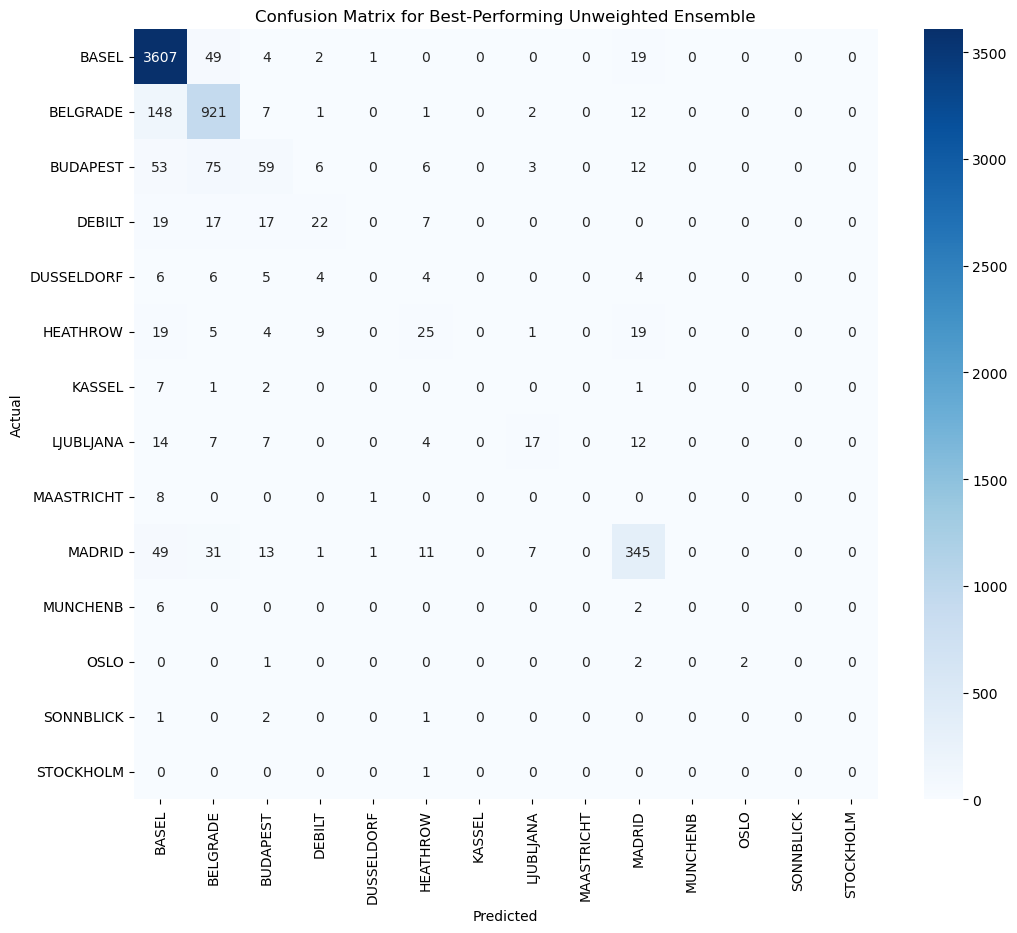

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Replace the integer class labels with the station names
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
    10: 'MUNCHENB',
    11: 'OSLO',
    12: 'SONNBLICK',
    13: 'STOCKHOLM',
    14: 'VALENTIA'
}

# Ensure the target names are derived from the station names based on unique classes in y_test
target_names = [stations[i] for i in range(len(np.unique(y_test)))]

# Generate predictions for the best-performing unweighted ensemble
ensemble_unweighted_predictions = np.mean(predictions, axis=0)  # Replace 'predictions' with those from the unweighted ensemble
ensemble_unweighted_classes = np.argmax(ensemble_unweighted_predictions, axis=1)

# Create confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, ensemble_unweighted_classes)
class_report = classification_report(y_test, ensemble_unweighted_classes, target_names=target_names)

# Print classification report
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best-Performing Unweighted Ensemble")
plt.show()

In [ ]:
#applying weighted averaging

In [68]:
# Placeholder for individual model accuracies
model_accuracies = []

# Train each model and record its individual test accuracy
for i, model in enumerate(models):
    print(f"Evaluating model {i+1}...")
    accuracy = model.evaluate(X_test, y_test, verbose=2)[1]
    model_accuracies.append(accuracy)

# Normalize accuracies to use as weights
weights = np.array(model_accuracies) / np.sum(model_accuracies)
print(f"Model weights based on accuracies: {weights}")

# Collect weighted predictions from all models
weighted_predictions = np.zeros_like(predictions[0])  # Initialize with zeros
for i, (model, weight) in enumerate(zip(models, weights)):
    preds = model.predict(X_test, verbose=0)
    weighted_predictions += weight * preds  # Weight each model's predictions

# Final ensemble predictions using weighted averaging
ensemble_classes = np.argmax(weighted_predictions, axis=1)

# Evaluate ensemble accuracy
ensemble_accuracy = np.mean(ensemble_classes == y_test)
print(f"\nWeighted Ensemble Test Accuracy: {ensemble_accuracy}")


Evaluating model 1...
180/180 - 1s - 5ms/step - accuracy: 0.8287 - loss: 0.5496
Evaluating model 2...
180/180 - 1s - 5ms/step - accuracy: 0.8493 - loss: 0.5061
Evaluating model 3...
180/180 - 1s - 5ms/step - accuracy: 0.7844 - loss: 0.6330
Evaluating model 4...
180/180 - 1s - 5ms/step - accuracy: 0.8550 - loss: 0.4684
Evaluating model 5...
180/180 - 1s - 5ms/step - accuracy: 0.8020 - loss: 0.5919
Model weights based on accuracies: [0.20116766 0.20615984 0.1904218  0.20755595 0.19469476]

Weighted Ensemble Test Accuracy: 0.8699895433949111


In [ ]:
#diverse ensemble

In [70]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop, Nadam

# Function to build a diverse RNN model with a new optimizer instance
def build_diverse_rnn_model(neurons, activation, dropout_rate, learning_rate, optimizer_type, layers):
    # Create a new optimizer instance based on the specified type
    if optimizer_type == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_type == 'Nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))
    
    if np.random.rand() > 0.5:  # Randomly apply normalization for diversity
        model.add(BatchNormalization())
    
    for i in range(layers - 1):
        model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
        if np.random.rand() > 0.5:  # Randomly apply dropout for diversity
            model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train and store multiple diverse models
num_models = 5
diverse_models = []
activation_options = ['relu', 'tanh', 'sigmoid']
optimizer_options = ['Adam', 'RMSprop', 'Nadam']

for i in range(num_models):
    print(f"Training diverse model {i+1}...")
    activation = np.random.choice(activation_options)
    optimizer_type = np.random.choice(optimizer_options)
    learning_rate = np.random.uniform(0.0005, 0.002)  # Randomize learning rate for diversity
    neurons = np.random.randint(50, 100)  # Randomize number of neurons
    dropout_rate = np.random.uniform(0.1, 0.5)  # Randomize dropout rate
    layers = np.random.randint(2, 4)  # Randomize the number of layers
    
    model = build_diverse_rnn_model(neurons, activation, dropout_rate, learning_rate, optimizer_type, layers)
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)
    diverse_models.append(model)

# Collect predictions from all diverse models
diverse_predictions = []
for model in diverse_models:
    preds = model.predict(X_test, verbose=0)
    diverse_predictions.append(preds)

# Average the predictions for ensemble output
ensemble_diverse_predictions = np.mean(diverse_predictions, axis=0)
ensemble_diverse_classes = np.argmax(ensemble_diverse_predictions, axis=1)

# Evaluate ensemble accuracy
ensemble_diverse_accuracy = np.mean(ensemble_diverse_classes == y_test)
print(f"\nDiverse Ensemble Test Accuracy: {ensemble_diverse_accuracy}")

Training diverse model 1...
Epoch 1/29
25/25 - 7s - 285ms/step - accuracy: 0.6023 - loss: 1.3243
Epoch 2/29
25/25 - 2s - 78ms/step - accuracy: 0.6857 - loss: 0.9078
Epoch 3/29
25/25 - 2s - 79ms/step - accuracy: 0.7241 - loss: 0.8231
Epoch 4/29
25/25 - 2s - 80ms/step - accuracy: 0.7560 - loss: 0.7416
Epoch 5/29
25/25 - 2s - 80ms/step - accuracy: 0.7809 - loss: 0.6713
Epoch 6/29
25/25 - 2s - 81ms/step - accuracy: 0.7972 - loss: 0.6181
Epoch 7/29
25/25 - 2s - 82ms/step - accuracy: 0.7965 - loss: 0.6169
Epoch 8/29
25/25 - 2s - 83ms/step - accuracy: 0.8177 - loss: 0.5631
Epoch 9/29
25/25 - 2s - 84ms/step - accuracy: 0.8209 - loss: 0.5433
Epoch 10/29
25/25 - 2s - 85ms/step - accuracy: 0.8276 - loss: 0.5338
Epoch 11/29
25/25 - 2s - 86ms/step - accuracy: 0.8394 - loss: 0.4952
Epoch 12/29
25/25 - 3s - 110ms/step - accuracy: 0.8421 - loss: 0.4797
Epoch 13/29
25/25 - 3s - 109ms/step - accuracy: 0.8362 - loss: 0.4962
Epoch 14/29
25/25 - 3s - 109ms/step - accuracy: 0.8524 - loss: 0.4539
Epoch 15/29

Epoch 2/29
25/25 - 2s - 77ms/step - accuracy: 0.6885 - loss: 0.8939
Epoch 3/29
25/25 - 2s - 76ms/step - accuracy: 0.7338 - loss: 0.7861
Epoch 4/29
25/25 - 2s - 78ms/step - accuracy: 0.7623 - loss: 0.7142
Epoch 5/29
25/25 - 2s - 78ms/step - accuracy: 0.7809 - loss: 0.6681
Epoch 6/29
25/25 - 2s - 76ms/step - accuracy: 0.7929 - loss: 0.6349
Epoch 7/29
25/25 - 2s - 78ms/step - accuracy: 0.8016 - loss: 0.6064
Epoch 8/29
25/25 - 2s - 76ms/step - accuracy: 0.8090 - loss: 0.5806
Epoch 9/29
25/25 - 2s - 77ms/step - accuracy: 0.8022 - loss: 0.6024
Epoch 10/29
25/25 - 2s - 75ms/step - accuracy: 0.8199 - loss: 0.5515
Epoch 11/29
25/25 - 2s - 74ms/step - accuracy: 0.8267 - loss: 0.5343
Epoch 12/29
25/25 - 2s - 73ms/step - accuracy: 0.8340 - loss: 0.5148
Epoch 13/29
25/25 - 2s - 74ms/step - accuracy: 0.8385 - loss: 0.4956
Epoch 14/29
25/25 - 2s - 73ms/step - accuracy: 0.8424 - loss: 0.4889
Epoch 15/29
25/25 - 2s - 73ms/step - accuracy: 0.8450 - loss: 0.4808
Epoch 16/29
25/25 - 2s - 73ms/step - accur

In [ ]:
#weighted diverse ensemble

In [71]:
# Evaluate and record individual accuracies of each model in the diverse ensemble
model_accuracies = []
for i, model in enumerate(diverse_models):
    print(f"Evaluating model {i+1}...")
    accuracy = model.evaluate(X_test, y_test, verbose=2)[1]
    model_accuracies.append(accuracy)

# Normalize the accuracies to use them as weights for weighted averaging
weights = np.array(model_accuracies) / np.sum(model_accuracies)
print(f"Model weights based on accuracies: {weights}")

# Collect weighted predictions from all models
weighted_diverse_predictions = np.zeros_like(diverse_predictions[0])  # Initialize with zeros
for i, (model, weight) in enumerate(zip(diverse_models, weights)):
    preds = model.predict(X_test, verbose=0)
    weighted_diverse_predictions += weight * preds  # Apply the weight to each model's predictions

# Final ensemble predictions using weighted averaging
ensemble_diverse_classes_weighted = np.argmax(weighted_diverse_predictions, axis=1)

# Evaluate the weighted ensemble accuracy
ensemble_diverse_weighted_accuracy = np.mean(ensemble_diverse_classes_weighted == y_test)
print(f"\nWeighted Diverse Ensemble Test Accuracy: {ensemble_diverse_weighted_accuracy}")


Evaluating model 1...
180/180 - 1s - 7ms/step - accuracy: 0.8796 - loss: 0.4084
Evaluating model 2...
180/180 - 1s - 6ms/step - accuracy: 0.7935 - loss: 0.6200
Evaluating model 3...
180/180 - 1s - 5ms/step - accuracy: 0.7363 - loss: 0.8558
Evaluating model 4...
180/180 - 1s - 8ms/step - accuracy: 0.8161 - loss: 0.5433
Evaluating model 5...
180/180 - 4s - 23ms/step - accuracy: 0.8519 - loss: 0.4833
Model weights based on accuracies: [0.21572064 0.19460592 0.18058643 0.20016242 0.2089246 ]

Weighted Diverse Ensemble Test Accuracy: 0.8661554548623214


In [ ]:
#applying class weights

In [75]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

# Print the class weights for verification
print("Class Weights:", class_weights_dict)

# Re-train the best-performing model with class weights
model = Sequential()
model.add(LSTM(neurons, activation=activation, input_shape=(timesteps, input_dim), return_sequences=(layers > 1)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers - 1):
    model.add(LSTM(neurons, activation=activation, return_sequences=(i < layers - 2)))
    if dropout > 0.5:
        model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(0.001)))

model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with class weights
es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, class_weight=class_weights_dict, callbacks=[es], verbose=2)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy with Class Weights: {accuracy[1]}")


Class Weights: {0: 0.11091921431149147, 1: 0.3671031864522459, 2: 2.052468399713809, 3: 4.977443609022556, 4: 11.176623376623377, 5: 4.13949013949014, 6: 35.1265306122449, 7: 7.683928571428571, 8: 58.54421768707483, 9: 0.9827566518214, 10: 53.453416149068325, 11: 64.70676691729324, 13: 204.9047619047619, 14: 111.76623376623377}
Epoch 1/29
25/25 - 5s - 182ms/step - accuracy: 0.1941 - loss: 2.6708
Epoch 2/29
25/25 - 1s - 37ms/step - accuracy: 0.3382 - loss: 2.4228
Epoch 3/29
25/25 - 1s - 37ms/step - accuracy: 0.3911 - loss: 2.2805
Epoch 4/29
25/25 - 1s - 38ms/step - accuracy: 0.4034 - loss: 2.1357
Epoch 5/29
25/25 - 1s - 38ms/step - accuracy: 0.4374 - loss: 1.9885
Epoch 6/29
25/25 - 1s - 37ms/step - accuracy: 0.4687 - loss: 1.8447
Epoch 7/29
25/25 - 1s - 38ms/step - accuracy: 0.4760 - loss: 1.7357
Epoch 8/29
25/25 - 1s - 38ms/step - accuracy: 0.5117 - loss: 1.6423
Epoch 9/29
25/25 - 1s - 38ms/step - accuracy: 0.5216 - loss: 1.5316
Epoch 10/29
25/25 - 1s - 38ms/step - accuracy: 0.5079 - l

In [78]:
# Reshape X_train to 2D
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten the data

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, y_train)

# Reshape X_train back to 3D
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# Verify the new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution after SMOTE:", dict(zip(unique, counts)))

Class Distribution after SMOTE: {0: 11084, 1: 11084, 2: 11084, 3: 11084, 4: 11084, 5: 11084, 6: 11084, 7: 11084, 8: 11084, 9: 11084, 10: 11084, 11: 11084, 13: 11084, 14: 11084}


In [ ]:
#applying SMOTE

In [80]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape X_train back to 3D if needed
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# Verify the new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution after RandomOverSampler:", dict(zip(unique, counts)))

print(f"Test Accuracy after SMOTE: {accuracy[1]}")

Class Distribution after RandomOverSampler: {0: 11084, 1: 11084, 2: 11084, 3: 11084, 4: 11084, 5: 11084, 6: 11084, 7: 11084, 8: 11084, 9: 11084, 10: 11084, 11: 11084, 13: 11084, 14: 11084}
Test Accuracy after SMOTE: 0.6097943782806396


In [ ]:
#combined sampling

In [81]:
from imblearn.combine import SMOTEENN

# Apply SMOTE with Edited Nearest Neighbors (ENN) for combined sampling
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape X_train back to 3D if needed
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# Train the model on the combined resampled data
model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy after SMOTEENN: {accuracy[1]}")


Epoch 1/29
214/214 - 13s - 61ms/step - accuracy: 0.8427 - loss: 0.5530
Epoch 2/29
214/214 - 12s - 54ms/step - accuracy: 0.9018 - loss: 0.3772
Epoch 3/29
214/214 - 12s - 55ms/step - accuracy: 0.9319 - loss: 0.2830
Epoch 4/29
214/214 - 12s - 56ms/step - accuracy: 0.9516 - loss: 0.2194
Epoch 5/29
214/214 - 12s - 57ms/step - accuracy: 0.9650 - loss: 0.1747
Epoch 6/29
214/214 - 12s - 58ms/step - accuracy: 0.9748 - loss: 0.1398
Epoch 7/29
214/214 - 13s - 59ms/step - accuracy: 0.9790 - loss: 0.1186
Epoch 8/29
214/214 - 13s - 61ms/step - accuracy: 0.9840 - loss: 0.0980
Epoch 9/29
214/214 - 13s - 63ms/step - accuracy: 0.9876 - loss: 0.0814
Epoch 10/29
214/214 - 14s - 66ms/step - accuracy: 0.9896 - loss: 0.0711
Epoch 11/29
214/214 - 15s - 68ms/step - accuracy: 0.9923 - loss: 0.0594
Epoch 12/29
214/214 - 15s - 70ms/step - accuracy: 0.9935 - loss: 0.0513
Epoch 13/29
214/214 - 16s - 73ms/step - accuracy: 0.9945 - loss: 0.0458
Epoch 14/29
214/214 - 16s - 77ms/step - accuracy: 0.9946 - loss: 0.0431
E

In [ ]:
#hyperparameter tuning on SMOTE model

In [82]:
from keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.0005, 0.002],
    'dropout_rate': [0.2, 0.3, 0.4],
    'l2_reg': [0.001, 0.0005, 0.002],
    'neurons': [64, 128],
    'layers': [2, 3]
}

best_accuracy = 0
best_params = {}

# Iterate through the parameter grid
for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    
    # Build model with current params
    model = Sequential()
    model.add(LSTM(params['neurons'], activation='relu', input_shape=(timesteps, input_dim),
                   kernel_regularizer=l2(params['l2_reg']), return_sequences=(params['layers'] > 1)))
    
    for i in range(params['layers'] - 1):
        model.add(LSTM(params['neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']),
                       return_sequences=(i < params['layers'] - 2)))
        model.add(Dropout(params['dropout_rate']))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=params['learning_rate']), metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=2)
    
    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=2)[1]
    print(f"Test Accuracy with params {params}: {accuracy}")
    
    # Track the best performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f"\nBest Hyperparameters: {best_params} with Test Accuracy: {best_accuracy}")


Training with params: {'dropout_rate': 0.2, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.001, 'neurons': 64}
Epoch 1/29
214/214 - 11s - 49ms/step - accuracy: 0.4781 - loss: 1.7257
Epoch 2/29
214/214 - 11s - 52ms/step - accuracy: 0.7691 - loss: 0.7420
Epoch 3/29
214/214 - 11s - 54ms/step - accuracy: 0.8473 - loss: 0.5066
Epoch 4/29
214/214 - 12s - 54ms/step - accuracy: 0.8853 - loss: 0.3949
Epoch 5/29
214/214 - 12s - 55ms/step - accuracy: 0.9031 - loss: 0.3396
Epoch 6/29
214/214 - 12s - 57ms/step - accuracy: 0.9244 - loss: 0.2780
Epoch 7/29
214/214 - 13s - 62ms/step - accuracy: 0.9290 - loss: 0.2648
Epoch 8/29
214/214 - 13s - 62ms/step - accuracy: 0.9417 - loss: 0.2278
Epoch 9/29
214/214 - 15s - 68ms/step - accuracy: 0.9509 - loss: 0.2013
Epoch 10/29
214/214 - 14s - 65ms/step - accuracy: 0.9552 - loss: 0.1868
Epoch 11/29
214/214 - 14s - 66ms/step - accuracy: 0.9538 - loss: 0.1913
Epoch 12/29
214/214 - 15s - 72ms/step - accuracy: 0.9624 - loss: 0.1664
Epoch 13/29
214/214 - 15s - 72ms

Epoch 15/29
214/214 - 13s - 63ms/step - accuracy: 0.9713 - loss: 0.1476
Epoch 16/29
214/214 - 13s - 62ms/step - accuracy: 0.9877 - loss: 0.0888
Epoch 17/29
214/214 - 13s - 58ms/step - accuracy: 0.9705 - loss: 0.1478
Epoch 18/29
214/214 - 12s - 57ms/step - accuracy: 0.9903 - loss: 0.0802
Epoch 19/29
214/214 - 12s - 57ms/step - accuracy: 0.9891 - loss: 0.0801
Epoch 20/29
214/214 - 13s - 59ms/step - accuracy: 0.9858 - loss: 0.0895
Epoch 20: early stopping
180/180 - 1s - 6ms/step - accuracy: 0.7016 - loss: 1.9399
Test Accuracy with params {'dropout_rate': 0.2, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.002, 'neurons': 64}: 0.7016382217407227
Training with params: {'dropout_rate': 0.2, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.002, 'neurons': 128}
Epoch 1/29
214/214 - 32s - 148ms/step - accuracy: 0.5798 - loss: 1.3731
Epoch 2/29
214/214 - 29s - 137ms/step - accuracy: 0.8273 - loss: 0.5754
Epoch 3/29
214/214 - 29s - 138ms/step - accuracy: 0.8987 - loss: 0.3629
Epoch 4/29
214/214

214/214 - 49s - 227ms/step - accuracy: 0.9233 - loss: 0.3718
Epoch 6/29
214/214 - 49s - 227ms/step - accuracy: 0.9359 - loss: 0.3276
Epoch 7/29
214/214 - 47s - 220ms/step - accuracy: 0.9472 - loss: 0.2874
Epoch 8/29
214/214 - 49s - 230ms/step - accuracy: 0.9566 - loss: 0.2542
Epoch 9/29
214/214 - 48s - 224ms/step - accuracy: 0.9605 - loss: 0.2353
Epoch 10/29
214/214 - 50s - 234ms/step - accuracy: 0.9646 - loss: 0.2171
Epoch 11/29
214/214 - 50s - 231ms/step - accuracy: 0.9670 - loss: 0.2051
Epoch 12/29
214/214 - 49s - 230ms/step - accuracy: 0.9724 - loss: 0.1866
Epoch 13/29
214/214 - 48s - 223ms/step - accuracy: 0.9755 - loss: 0.1709
Epoch 14/29
214/214 - 49s - 228ms/step - accuracy: 0.9741 - loss: 0.1719
Epoch 15/29
214/214 - 50s - 233ms/step - accuracy: 0.9773 - loss: 0.1595
Epoch 16/29
214/214 - 48s - 224ms/step - accuracy: 0.9758 - loss: 0.1625
Epoch 17/29
214/214 - 50s - 232ms/step - accuracy: 0.9829 - loss: 0.1354
Epoch 18/29
214/214 - 50s - 233ms/step - accuracy: 0.9797 - loss: 0

Epoch 20/29
214/214 - 29s - 135ms/step - accuracy: 0.9884 - loss: 0.0719
Epoch 20: early stopping
180/180 - 2s - 9ms/step - accuracy: 0.6931 - loss: 2.2136
Test Accuracy with params {'dropout_rate': 0.2, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.001, 'neurons': 128}: 0.6930986642837524
Training with params: {'dropout_rate': 0.2, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 64}
Epoch 1/29
214/214 - 17s - 78ms/step - accuracy: 0.4271 - loss: 1.9145
Epoch 2/29
214/214 - 14s - 66ms/step - accuracy: 0.7172 - loss: 0.8851
Epoch 3/29
214/214 - 14s - 65ms/step - accuracy: 0.8000 - loss: 0.6243
Epoch 4/29
214/214 - 14s - 65ms/step - accuracy: 0.8537 - loss: 0.4654
Epoch 5/29
214/214 - 14s - 66ms/step - accuracy: 0.8837 - loss: 0.3804
Epoch 6/29
214/214 - 14s - 66ms/step - accuracy: 0.9032 - loss: 0.3251
Epoch 7/29
214/214 - 14s - 64ms/step - accuracy: 0.9153 - loss: 0.2854
Epoch 8/29
214/214 - 13s - 62ms/step - accuracy: 0.9283 - loss: 0.2483
Epoch 9/29
214/214 - 1

Epoch 11/29
214/214 - 24s - 114ms/step - accuracy: 0.9523 - loss: 0.1989
Epoch 12/29
214/214 - 24s - 112ms/step - accuracy: 0.9595 - loss: 0.1750
Epoch 13/29
214/214 - 24s - 110ms/step - accuracy: 0.9618 - loss: 0.1701
Epoch 14/29
214/214 - 23s - 109ms/step - accuracy: 0.9636 - loss: 0.1651
Epoch 15/29
214/214 - 23s - 110ms/step - accuracy: 0.9637 - loss: 0.1636
Epoch 16/29
214/214 - 25s - 115ms/step - accuracy: 0.9676 - loss: 0.1533
Epoch 17/29
214/214 - 25s - 117ms/step - accuracy: 0.9689 - loss: 0.1469
Epoch 18/29
214/214 - 24s - 113ms/step - accuracy: 0.9736 - loss: 0.1344
Epoch 19/29
214/214 - 23s - 109ms/step - accuracy: 0.9721 - loss: 0.1386
Epoch 20/29
214/214 - 24s - 112ms/step - accuracy: 0.9749 - loss: 0.1291
Epoch 20: early stopping
180/180 - 2s - 9ms/step - accuracy: 0.6211 - loss: 2.1377
Test Accuracy with params {'dropout_rate': 0.2, 'l2_reg': 0.0005, 'layers': 3, 'learning_rate': 0.001, 'neurons': 64}: 0.6211223602294922
Training with params: {'dropout_rate': 0.2, 'l2_r

214/214 - 48s - 222ms/step - accuracy: 0.5011 - loss: 1.5839
Epoch 2/29
214/214 - 45s - 209ms/step - accuracy: 0.7776 - loss: 0.7140
Epoch 3/29
214/214 - 45s - 213ms/step - accuracy: 0.8713 - loss: 0.4426
Epoch 4/29
214/214 - 43s - 201ms/step - accuracy: 0.9128 - loss: 0.3253
Epoch 5/29
214/214 - 43s - 200ms/step - accuracy: 0.9360 - loss: 0.2573
Epoch 6/29
214/214 - 46s - 214ms/step - accuracy: 0.9479 - loss: 0.2222
Epoch 7/29
214/214 - 43s - 202ms/step - accuracy: 0.9597 - loss: 0.1869
Epoch 8/29
214/214 - 44s - 207ms/step - accuracy: 0.9660 - loss: 0.1677
Epoch 9/29
214/214 - 62s - 289ms/step - accuracy: 0.9649 - loss: 0.1690
Epoch 10/29
214/214 - 56s - 260ms/step - accuracy: 0.9734 - loss: 0.1419
Epoch 11/29
214/214 - 50s - 233ms/step - accuracy: 0.9747 - loss: 0.1369
Epoch 12/29
214/214 - 52s - 241ms/step - accuracy: 0.9793 - loss: 0.1221
Epoch 13/29
214/214 - 48s - 224ms/step - accuracy: 0.9792 - loss: 0.1214
Epoch 14/29
214/214 - 53s - 246ms/step - accuracy: 0.9832 - loss: 0.107

214/214 - 30s - 142ms/step - accuracy: 0.9776 - loss: 0.1464
Epoch 17/29
214/214 - 32s - 151ms/step - accuracy: 0.9777 - loss: 0.1449
Epoch 18/29
214/214 - 31s - 146ms/step - accuracy: 0.9782 - loss: 0.1407
Epoch 19/29
214/214 - 32s - 151ms/step - accuracy: 0.9784 - loss: 0.1392
Epoch 20/29
214/214 - 32s - 151ms/step - accuracy: 0.9848 - loss: 0.1164
Epoch 20: early stopping
180/180 - 2s - 10ms/step - accuracy: 0.6751 - loss: 2.3349
Test Accuracy with params {'dropout_rate': 0.2, 'l2_reg': 0.002, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 128}: 0.6751481294631958
Training with params: {'dropout_rate': 0.2, 'l2_reg': 0.002, 'layers': 2, 'learning_rate': 0.002, 'neurons': 64}
Epoch 1/29
214/214 - 27s - 125ms/step - accuracy: 0.5054 - loss: 1.7370
Epoch 2/29
214/214 - 16s - 76ms/step - accuracy: 0.7581 - loss: 0.7954
Epoch 3/29
214/214 - 16s - 74ms/step - accuracy: 0.8448 - loss: 0.5361
Epoch 4/29
214/214 - 15s - 72ms/step - accuracy: 0.8982 - loss: 0.3793
Epoch 5/29
214/214 - 16s -

Epoch 7/29
214/214 - 25s - 119ms/step - accuracy: 0.8932 - loss: 0.4509
Epoch 8/29
214/214 - 25s - 115ms/step - accuracy: 0.9041 - loss: 0.4116
Epoch 9/29
214/214 - 25s - 115ms/step - accuracy: 0.9119 - loss: 0.3818
Epoch 10/29
214/214 - 25s - 119ms/step - accuracy: 0.9227 - loss: 0.3488
Epoch 11/29
214/214 - 25s - 119ms/step - accuracy: 0.9309 - loss: 0.3217
Epoch 12/29
214/214 - 25s - 117ms/step - accuracy: 0.9347 - loss: 0.3067
Epoch 13/29
214/214 - 25s - 115ms/step - accuracy: 0.9398 - loss: 0.2884
Epoch 14/29
214/214 - 25s - 118ms/step - accuracy: 0.9439 - loss: 0.2735
Epoch 15/29
214/214 - 25s - 118ms/step - accuracy: 0.9477 - loss: 0.2588
Epoch 16/29
214/214 - 25s - 115ms/step - accuracy: 0.9515 - loss: 0.2452
Epoch 17/29
214/214 - 25s - 119ms/step - accuracy: 0.9534 - loss: 0.2373
Epoch 18/29
214/214 - 25s - 119ms/step - accuracy: 0.9549 - loss: 0.2310
Epoch 19/29
214/214 - 25s - 117ms/step - accuracy: 0.9610 - loss: 0.2111
Epoch 20/29
214/214 - 24s - 114ms/step - accuracy: 0.9

Test Accuracy with params {'dropout_rate': 0.3, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.001, 'neurons': 64}: 0.6573718786239624
Training with params: {'dropout_rate': 0.3, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.001, 'neurons': 128}
Epoch 1/29
214/214 - 32s - 148ms/step - accuracy: 0.5288 - loss: 1.5465
Epoch 2/29
214/214 - 30s - 141ms/step - accuracy: 0.7921 - loss: 0.6866
Epoch 3/29
214/214 - 32s - 150ms/step - accuracy: 0.8772 - loss: 0.4305
Epoch 4/29
214/214 - 30s - 142ms/step - accuracy: 0.9146 - loss: 0.3191
Epoch 5/29
214/214 - 28s - 132ms/step - accuracy: 0.9414 - loss: 0.2404
Epoch 6/29
214/214 - 29s - 138ms/step - accuracy: 0.9505 - loss: 0.2118
Epoch 7/29
214/214 - 30s - 141ms/step - accuracy: 0.9609 - loss: 0.1799
Epoch 8/29
214/214 - 29s - 138ms/step - accuracy: 0.9668 - loss: 0.1604
Epoch 9/29
214/214 - 30s - 142ms/step - accuracy: 0.9717 - loss: 0.1437
Epoch 10/29
214/214 - 29s - 135ms/step - accuracy: 0.9761 - loss: 0.1297
Epoch 11/29
214/214 - 29s - 

Epoch 13/29
214/214 - 23s - 107ms/step - accuracy: 0.9856 - loss: 0.0964
Epoch 14/29
214/214 - 22s - 103ms/step - accuracy: 0.9825 - loss: 0.1045
Epoch 15/29
214/214 - 22s - 104ms/step - accuracy: 0.9830 - loss: 0.1052
Epoch 16/29
214/214 - 23s - 106ms/step - accuracy: 0.9841 - loss: 0.0989
Epoch 17/29
214/214 - 23s - 108ms/step - accuracy: 0.9877 - loss: 0.0864
Epoch 18/29
214/214 - 24s - 112ms/step - accuracy: 0.9870 - loss: 0.0869
Epoch 19/29
214/214 - 23s - 109ms/step - accuracy: 0.9872 - loss: 0.0858
Epoch 20/29
214/214 - 23s - 106ms/step - accuracy: 0.9788 - loss: 0.1196
Epoch 20: early stopping
180/180 - 2s - 8ms/step - accuracy: 0.6943 - loss: 1.6776
Test Accuracy with params {'dropout_rate': 0.3, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.002, 'neurons': 128}: 0.6943185925483704
Training with params: {'dropout_rate': 0.3, 'l2_reg': 0.001, 'layers': 3, 'learning_rate': 0.001, 'neurons': 64}
Epoch 1/29
214/214 - 27s - 127ms/step - accuracy: 0.4319 - loss: 1.8193
Epoch 2/29

Epoch 5/29
214/214 - 24s - 110ms/step - accuracy: 0.9174 - loss: 0.3304
Epoch 6/29
214/214 - 24s - 110ms/step - accuracy: 0.9315 - loss: 0.2864
Epoch 7/29
214/214 - 24s - 113ms/step - accuracy: 0.9460 - loss: 0.2439
Epoch 8/29
214/214 - 24s - 113ms/step - accuracy: 0.9523 - loss: 0.2219
Epoch 9/29
214/214 - 24s - 113ms/step - accuracy: 0.9568 - loss: 0.2096
Epoch 10/29
214/214 - 24s - 112ms/step - accuracy: 0.9669 - loss: 0.1757
Epoch 11/29
214/214 - 23s - 109ms/step - accuracy: 0.9690 - loss: 0.1646
Epoch 12/29
214/214 - 24s - 110ms/step - accuracy: 0.9706 - loss: 0.1601
Epoch 13/29
214/214 - 24s - 112ms/step - accuracy: 0.9754 - loss: 0.1470
Epoch 14/29
214/214 - 24s - 112ms/step - accuracy: 0.9790 - loss: 0.1295
Epoch 15/29
214/214 - 24s - 110ms/step - accuracy: 0.9782 - loss: 0.1321
Epoch 16/29
214/214 - 24s - 113ms/step - accuracy: 0.9811 - loss: 0.1204
Epoch 17/29
214/214 - 24s - 110ms/step - accuracy: 0.9785 - loss: 0.1302
Epoch 18/29
214/214 - 23s - 110ms/step - accuracy: 0.980

Epoch 20/29
214/214 - 16s - 73ms/step - accuracy: 0.9643 - loss: 0.1416
Epoch 20: early stopping
180/180 - 1s - 7ms/step - accuracy: 0.6553 - loss: 2.1684
Test Accuracy with params {'dropout_rate': 0.3, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 64}: 0.655280590057373
Training with params: {'dropout_rate': 0.3, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 128}
Epoch 1/29
214/214 - 31s - 145ms/step - accuracy: 0.4796 - loss: 1.6447
Epoch 2/29
214/214 - 24s - 112ms/step - accuracy: 0.7644 - loss: 0.7472
Epoch 3/29
214/214 - 25s - 115ms/step - accuracy: 0.8504 - loss: 0.4851
Epoch 4/29
214/214 - 25s - 117ms/step - accuracy: 0.8918 - loss: 0.3648
Epoch 5/29
214/214 - 24s - 112ms/step - accuracy: 0.9197 - loss: 0.2864
Epoch 6/29
214/214 - 24s - 113ms/step - accuracy: 0.9384 - loss: 0.2331
Epoch 7/29
214/214 - 25s - 115ms/step - accuracy: 0.9497 - loss: 0.2006
Epoch 8/29
214/214 - 24s - 112ms/step - accuracy: 0.9552 - loss: 0.1849
Epoch 9/29
214/

214/214 - 38s - 175ms/step - accuracy: 0.9675 - loss: 0.1638
Epoch 11/29
214/214 - 39s - 182ms/step - accuracy: 0.9708 - loss: 0.1515
Epoch 12/29
214/214 - 39s - 180ms/step - accuracy: 0.9729 - loss: 0.1438
Epoch 13/29
214/214 - 39s - 181ms/step - accuracy: 0.9771 - loss: 0.1312
Epoch 14/29
214/214 - 38s - 179ms/step - accuracy: 0.9798 - loss: 0.1223
Epoch 15/29
214/214 - 39s - 180ms/step - accuracy: 0.9805 - loss: 0.1190
Epoch 16/29
214/214 - 39s - 181ms/step - accuracy: 0.9824 - loss: 0.1109
Epoch 17/29
214/214 - 39s - 180ms/step - accuracy: 0.9805 - loss: 0.1163
Epoch 18/29
214/214 - 40s - 185ms/step - accuracy: 0.9820 - loss: 0.1098
Epoch 19/29
214/214 - 38s - 177ms/step - accuracy: 0.9849 - loss: 0.1003
Epoch 20/29
214/214 - 39s - 181ms/step - accuracy: 0.9862 - loss: 0.0968
Epoch 20: early stopping
180/180 - 2s - 12ms/step - accuracy: 0.6682 - loss: 2.2756
Test Accuracy with params {'dropout_rate': 0.3, 'l2_reg': 0.0005, 'layers': 3, 'learning_rate': 0.001, 'neurons': 128}: 0.668

214/214 - 19s - 87ms/step - accuracy: 0.4255 - loss: 1.9372
Epoch 2/29
214/214 - 16s - 77ms/step - accuracy: 0.7195 - loss: 0.9201
Epoch 3/29
214/214 - 17s - 78ms/step - accuracy: 0.8106 - loss: 0.6432
Epoch 4/29
214/214 - 17s - 79ms/step - accuracy: 0.8609 - loss: 0.4931
Epoch 5/29
214/214 - 17s - 80ms/step - accuracy: 0.8882 - loss: 0.4137
Epoch 6/29
214/214 - 17s - 81ms/step - accuracy: 0.9050 - loss: 0.3652
Epoch 7/29
214/214 - 17s - 79ms/step - accuracy: 0.9161 - loss: 0.3292
Epoch 8/29
214/214 - 17s - 79ms/step - accuracy: 0.9303 - loss: 0.2861
Epoch 9/29
214/214 - 17s - 79ms/step - accuracy: 0.9315 - loss: 0.2836
Epoch 10/29
214/214 - 17s - 80ms/step - accuracy: 0.9428 - loss: 0.2478
Epoch 11/29
214/214 - 17s - 80ms/step - accuracy: 0.9499 - loss: 0.2227
Epoch 12/29
214/214 - 17s - 80ms/step - accuracy: 0.9540 - loss: 0.2101
Epoch 13/29
214/214 - 17s - 79ms/step - accuracy: 0.9553 - loss: 0.2054
Epoch 14/29
214/214 - 17s - 79ms/step - accuracy: 0.9607 - loss: 0.1885
Epoch 15/29


Epoch 17/29
214/214 - 17s - 79ms/step - accuracy: 0.9788 - loss: 0.1283
Epoch 18/29
214/214 - 17s - 80ms/step - accuracy: 0.9675 - loss: 0.1632
Epoch 19/29
214/214 - 17s - 79ms/step - accuracy: 0.9805 - loss: 0.1217
Epoch 20/29
214/214 - 17s - 80ms/step - accuracy: 0.9824 - loss: 0.1130
Epoch 20: early stopping
180/180 - 1s - 7ms/step - accuracy: 0.7168 - loss: 1.8345
Test Accuracy with params {'dropout_rate': 0.3, 'l2_reg': 0.002, 'layers': 2, 'learning_rate': 0.002, 'neurons': 64}: 0.7168002724647522
Training with params: {'dropout_rate': 0.3, 'l2_reg': 0.002, 'layers': 2, 'learning_rate': 0.002, 'neurons': 128}
Epoch 1/29
214/214 - 32s - 151ms/step - accuracy: 0.5325 - loss: 1.6041
Epoch 2/29
214/214 - 25s - 117ms/step - accuracy: 0.8096 - loss: 0.6617
Epoch 3/29
214/214 - 25s - 118ms/step - accuracy: 0.8908 - loss: 0.4172
Epoch 4/29
214/214 - 25s - 117ms/step - accuracy: 0.9261 - loss: 0.3078
Epoch 5/29
214/214 - 25s - 117ms/step - accuracy: 0.9435 - loss: 0.2515
Epoch 6/29
214/214

Epoch 7/29
214/214 - 39s - 183ms/step - accuracy: 0.9320 - loss: 0.3791
Epoch 8/29
214/214 - 40s - 185ms/step - accuracy: 0.9413 - loss: 0.3363
Epoch 9/29
214/214 - 40s - 187ms/step - accuracy: 0.9484 - loss: 0.3038
Epoch 10/29
214/214 - 40s - 186ms/step - accuracy: 0.9372 - loss: 0.3366
Epoch 11/29
214/214 - 39s - 184ms/step - accuracy: 0.9521 - loss: 0.2812
Epoch 12/29
214/214 - 40s - 185ms/step - accuracy: 0.9652 - loss: 0.2339
Epoch 13/29
214/214 - 40s - 185ms/step - accuracy: 0.9644 - loss: 0.2289
Epoch 14/29
214/214 - 40s - 185ms/step - accuracy: 0.9678 - loss: 0.2144
Epoch 15/29
214/214 - 40s - 188ms/step - accuracy: 0.9703 - loss: 0.2025
Epoch 16/29
214/214 - 38s - 180ms/step - accuracy: 0.9683 - loss: 0.2016
Epoch 17/29
214/214 - 39s - 184ms/step - accuracy: 0.9704 - loss: 0.1960
Epoch 18/29
214/214 - 40s - 187ms/step - accuracy: 0.9729 - loss: 0.1820
Epoch 19/29
214/214 - 39s - 184ms/step - accuracy: 0.9760 - loss: 0.1694
Epoch 20/29
214/214 - 40s - 186ms/step - accuracy: 0.9

Test Accuracy with params {'dropout_rate': 0.4, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.001, 'neurons': 128}: 0.6680027842521667
Training with params: {'dropout_rate': 0.4, 'l2_reg': 0.001, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 64}
Epoch 1/29
214/214 - 20s - 95ms/step - accuracy: 0.3301 - loss: 2.2103
Epoch 2/29
214/214 - 18s - 85ms/step - accuracy: 0.6361 - loss: 1.1649
Epoch 3/29
214/214 - 18s - 84ms/step - accuracy: 0.7357 - loss: 0.8436
Epoch 4/29
214/214 - 18s - 83ms/step - accuracy: 0.7923 - loss: 0.6726
Epoch 5/29
214/214 - 18s - 84ms/step - accuracy: 0.8268 - loss: 0.5689
Epoch 6/29
214/214 - 18s - 86ms/step - accuracy: 0.8527 - loss: 0.4957
Epoch 7/29
214/214 - 18s - 86ms/step - accuracy: 0.8728 - loss: 0.4363
Epoch 8/29
214/214 - 18s - 84ms/step - accuracy: 0.8876 - loss: 0.3932
Epoch 9/29
214/214 - 18s - 83ms/step - accuracy: 0.9007 - loss: 0.3527
Epoch 10/29
214/214 - 18s - 84ms/step - accuracy: 0.9119 - loss: 0.3188
Epoch 11/29
214/214 - 18s - 85ms/step

Epoch 13/29
214/214 - 29s - 135ms/step - accuracy: 0.9388 - loss: 0.2539
Epoch 14/29
214/214 - 28s - 131ms/step - accuracy: 0.9432 - loss: 0.2395
Epoch 15/29
214/214 - 28s - 131ms/step - accuracy: 0.9328 - loss: 0.2754
Epoch 16/29
214/214 - 29s - 134ms/step - accuracy: 0.9497 - loss: 0.2211
Epoch 17/29
214/214 - 29s - 134ms/step - accuracy: 0.9431 - loss: 0.2468
Epoch 18/29
214/214 - 28s - 129ms/step - accuracy: 0.9585 - loss: 0.1951
Epoch 19/29
214/214 - 28s - 131ms/step - accuracy: 0.9550 - loss: 0.2056
Epoch 20/29
214/214 - 29s - 134ms/step - accuracy: 0.9584 - loss: 0.1937
Epoch 20: early stopping
180/180 - 2s - 11ms/step - accuracy: 0.6542 - loss: 1.7930
Test Accuracy with params {'dropout_rate': 0.4, 'l2_reg': 0.001, 'layers': 3, 'learning_rate': 0.001, 'neurons': 64}: 0.6542349457740784
Training with params: {'dropout_rate': 0.4, 'l2_reg': 0.001, 'layers': 3, 'learning_rate': 0.001, 'neurons': 128}
Epoch 1/29
214/214 - 43s - 201ms/step - accuracy: 0.4779 - loss: 1.7683
Epoch 2/2

Epoch 3/29
214/214 - 40s - 189ms/step - accuracy: 0.8634 - loss: 0.4928
Epoch 4/29
214/214 - 41s - 191ms/step - accuracy: 0.9035 - loss: 0.3737
Epoch 5/29
214/214 - 40s - 188ms/step - accuracy: 0.9230 - loss: 0.3127
Epoch 6/29
214/214 - 40s - 189ms/step - accuracy: 0.9405 - loss: 0.2615
Epoch 7/29
214/214 - 41s - 192ms/step - accuracy: 0.9445 - loss: 0.2480
Epoch 8/29
214/214 - 40s - 186ms/step - accuracy: 0.9549 - loss: 0.2177
Epoch 9/29
214/214 - 40s - 189ms/step - accuracy: 0.9568 - loss: 0.2120
Epoch 10/29
214/214 - 41s - 190ms/step - accuracy: 0.9671 - loss: 0.1769
Epoch 11/29
214/214 - 40s - 187ms/step - accuracy: 0.9683 - loss: 0.1689
Epoch 12/29
214/214 - 41s - 190ms/step - accuracy: 0.9731 - loss: 0.1546
Epoch 13/29
214/214 - 40s - 188ms/step - accuracy: 0.9704 - loss: 0.1657
Epoch 14/29
214/214 - 40s - 189ms/step - accuracy: 0.9717 - loss: 0.1619
Epoch 15/29
214/214 - 40s - 189ms/step - accuracy: 0.9814 - loss: 0.1274
Epoch 16/29
214/214 - 40s - 189ms/step - accuracy: 0.9785 

Epoch 18/29
214/214 - 24s - 114ms/step - accuracy: 0.9826 - loss: 0.1001
Epoch 19/29
214/214 - 25s - 117ms/step - accuracy: 0.9855 - loss: 0.0894
Epoch 20/29
214/214 - 25s - 119ms/step - accuracy: 0.9827 - loss: 0.0975
Epoch 20: early stopping
180/180 - 2s - 10ms/step - accuracy: 0.6950 - loss: 2.2604
Test Accuracy with params {'dropout_rate': 0.4, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.0005, 'neurons': 128}: 0.6950156688690186
Training with params: {'dropout_rate': 0.4, 'l2_reg': 0.0005, 'layers': 2, 'learning_rate': 0.002, 'neurons': 64}
Epoch 1/29
214/214 - 22s - 101ms/step - accuracy: 0.4585 - loss: 1.7148
Epoch 2/29
214/214 - 19s - 87ms/step - accuracy: 0.7475 - loss: 0.7718
Epoch 3/29
214/214 - 18s - 85ms/step - accuracy: 0.8399 - loss: 0.4937
Epoch 4/29
214/214 - 18s - 86ms/step - accuracy: 0.8841 - loss: 0.3714
Epoch 5/29
214/214 - 19s - 88ms/step - accuracy: 0.9072 - loss: 0.3108
Epoch 6/29
214/214 - 19s - 89ms/step - accuracy: 0.9294 - loss: 0.2514
Epoch 7/29
214/2

Epoch 8/29
214/214 - 32s - 148ms/step - accuracy: 0.8893 - loss: 0.3872
Epoch 9/29
214/214 - 31s - 143ms/step - accuracy: 0.9043 - loss: 0.3463
Epoch 10/29
214/214 - 31s - 144ms/step - accuracy: 0.9128 - loss: 0.3164
Epoch 11/29
214/214 - 32s - 148ms/step - accuracy: 0.9216 - loss: 0.2913
Epoch 12/29
214/214 - 31s - 144ms/step - accuracy: 0.9261 - loss: 0.2757
Epoch 13/29
214/214 - 31s - 144ms/step - accuracy: 0.9335 - loss: 0.2553
Epoch 14/29
214/214 - 32s - 148ms/step - accuracy: 0.9352 - loss: 0.2511
Epoch 15/29
214/214 - 32s - 148ms/step - accuracy: 0.9427 - loss: 0.2275
Epoch 16/29
214/214 - 31s - 143ms/step - accuracy: 0.9486 - loss: 0.2083
Epoch 17/29
214/214 - 31s - 144ms/step - accuracy: 0.9479 - loss: 0.2103
Epoch 18/29
214/214 - 32s - 149ms/step - accuracy: 0.9546 - loss: 0.1904
Epoch 19/29
214/214 - 31s - 146ms/step - accuracy: 0.9562 - loss: 0.1863
Epoch 20/29
214/214 - 30s - 142ms/step - accuracy: 0.9599 - loss: 0.1738
Epoch 20: early stopping
180/180 - 2s - 11ms/step - a

214/214 - 28s - 129ms/step - accuracy: 0.4931 - loss: 1.7457
Epoch 2/29
214/214 - 26s - 120ms/step - accuracy: 0.7550 - loss: 0.8453
Epoch 3/29
214/214 - 26s - 122ms/step - accuracy: 0.8387 - loss: 0.5804
Epoch 4/29
214/214 - 26s - 122ms/step - accuracy: 0.8845 - loss: 0.4356
Epoch 5/29
214/214 - 25s - 117ms/step - accuracy: 0.9058 - loss: 0.3702
Epoch 6/29
214/214 - 25s - 116ms/step - accuracy: 0.9280 - loss: 0.2990
Epoch 7/29
214/214 - 25s - 118ms/step - accuracy: 0.9413 - loss: 0.2546
Epoch 8/29
214/214 - 26s - 122ms/step - accuracy: 0.9501 - loss: 0.2253
Epoch 9/29
214/214 - 26s - 123ms/step - accuracy: 0.9534 - loss: 0.2149
Epoch 10/29
214/214 - 25s - 118ms/step - accuracy: 0.9584 - loss: 0.1990
Epoch 11/29
214/214 - 25s - 117ms/step - accuracy: 0.9674 - loss: 0.1680
Epoch 12/29
214/214 - 25s - 119ms/step - accuracy: 0.9672 - loss: 0.1673
Epoch 13/29
214/214 - 26s - 121ms/step - accuracy: 0.9459 - loss: 0.2436
Epoch 14/29
214/214 - 25s - 119ms/step - accuracy: 0.9749 - loss: 0.142

214/214 - 27s - 127ms/step - accuracy: 0.9805 - loss: 0.1164
Epoch 17/29
214/214 - 26s - 123ms/step - accuracy: 0.9797 - loss: 0.1183
Epoch 18/29
214/214 - 26s - 122ms/step - accuracy: 0.9846 - loss: 0.1036
Epoch 19/29
214/214 - 26s - 123ms/step - accuracy: 0.9798 - loss: 0.1225
Epoch 20/29
214/214 - 27s - 126ms/step - accuracy: 0.9818 - loss: 0.1128
Epoch 20: early stopping
180/180 - 2s - 10ms/step - accuracy: 0.6720 - loss: 2.2835
Test Accuracy with params {'dropout_rate': 0.4, 'l2_reg': 0.002, 'layers': 2, 'learning_rate': 0.002, 'neurons': 128}: 0.672011137008667
Training with params: {'dropout_rate': 0.4, 'l2_reg': 0.002, 'layers': 3, 'learning_rate': 0.001, 'neurons': 64}
Epoch 1/29
214/214 - 37s - 173ms/step - accuracy: 0.3906 - loss: 2.0551
Epoch 2/29
214/214 - 33s - 153ms/step - accuracy: 0.6926 - loss: 1.0463
Epoch 3/29
214/214 - 33s - 156ms/step - accuracy: 0.7942 - loss: 0.7213
Epoch 4/29
214/214 - 34s - 158ms/step - accuracy: 0.8375 - loss: 0.5887
Epoch 5/29
214/214 - 34s 

Epoch 6/29
214/214 - 37s - 172ms/step - accuracy: 0.9069 - loss: 0.3670
Epoch 7/29
214/214 - 35s - 165ms/step - accuracy: 0.9229 - loss: 0.3192
Epoch 8/29
214/214 - 37s - 171ms/step - accuracy: 0.9294 - loss: 0.3008
Epoch 9/29
214/214 - 36s - 169ms/step - accuracy: 0.9377 - loss: 0.2748
Epoch 10/29
214/214 - 36s - 170ms/step - accuracy: 0.9442 - loss: 0.2537
Epoch 11/29
214/214 - 35s - 164ms/step - accuracy: 0.9463 - loss: 0.2514
Epoch 12/29
214/214 - 36s - 168ms/step - accuracy: 0.9513 - loss: 0.2326
Epoch 13/29
214/214 - 37s - 173ms/step - accuracy: 0.9534 - loss: 0.2266
Epoch 14/29
214/214 - 36s - 168ms/step - accuracy: 0.9513 - loss: 0.2418
Epoch 15/29
214/214 - 37s - 171ms/step - accuracy: 0.9606 - loss: 0.2026
Epoch 16/29
214/214 - 36s - 170ms/step - accuracy: 0.9639 - loss: 0.1924
Epoch 17/29
214/214 - 37s - 172ms/step - accuracy: 0.9625 - loss: 0.1944
Epoch 18/29
214/214 - 35s - 165ms/step - accuracy: 0.9629 - loss: 0.1925
Epoch 19/29
214/214 - 36s - 166ms/step - accuracy: 0.95

In [ ]:
#the best-performing model remains the ensemble approach from a few iterations ago